# Evaluating and Predicting Deterioration of Small and Medium Span Bridges Using Machine Learning Applications

**Context**


**Objective**
To build a predictive model that can find out the NBI raiting of each Bridge at a particular location and then provide actionable recommendations to the state planners to understand the importance factors of the bridge deterioration which play a key role in increasing safety of the bridges and money management.

**Dataset**


# **Importing the libraries and overview of the dataset**


In [2]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

import random
import warnings



In [3]:
#import data
df=pd.read_excel('FHWA_Model.xlsx')
df.head()


STRUCTURE_UMBER_008   LAT_016   LOG_017  YEAR_BUILT_027  ADT_029_2021  \
0             1MD0071  39000406  77050837            1980           200   
1             1MD0135  38583030  77105694            1980           500   
2             1MD0180  38595760  77052896            1950          2000   
3             1MD0265  39000580  77052460            1975           500   
4             1MD0641  38590970  76293010            1983          4400   

   YEAR_ADT_030  STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
0          2015                   1                    1                202.8   
1          2019                   3                    2                  7.8   
2          2003                   5                    4                  7.1   
3          2015                   1                   19                  7.9   
4          2005                   5                    2                152.2   

   DECK_WIDTH_MT_052  ...  CULVERT_COD_10062_2019  CULVERT_COD_10062_2018  \
0                9.1  ...                     100                     100   
1                7.8  ...                     100                     100   
2               12.3  ...                     100                     100   
3                0.0  ...                       6                       6   
4               11.0  ...                     100                     100   

   CULVERT_COD_10062_2017  CULVERT_COD_10062_2016  CULVERT_COD_10062_2015  \
0                     100                     100                     100   
1                     100                     100                     100   
2                     100                     100                     100   
3                       6                       6                       6   
4                     100                     100                     100   

   CULVERT_COD_10062_2014  CULVERT_COD_10062_2013 CULVERT_COD_10062_2012  \
0                     100                     100                    100   
1                     100                     100                    100   
2                     100                     100                    100   
3                       6                       6                      7   
4                     100                     100                    100   

   CULVERT_COD_10062_2011  CULVERT_COD_10062_2010  
0                     100                     100  
1                     100                     100  
2                     100                     100  
3                       7                       7  
4                     100                     100  

[5 rows x 98 columns]

In [4]:
df.columns

Index(['STRUCTURE_UMBER_008', 'LAT_016', 'LOG_017', 'YEAR_BUILT_027',
       'ADT_029_2021', 'YEAR_ADT_030', 'STRUCTURE_KID_043A',
       'STRUCTURE_TYPE_043B', 'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052',
       'DECK_COD_10058_2021', 'SUPERSTRUCTURE_COD_10059_2021',
       'SUBSTRUCTURE_COD_1006100_2021', 'CULVERT_COD_10062_2021',
       'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109', 'COUNTY_CODE_003',
       'County', 'Max_Temp_2010', 'Max_Temp_2011', 'Max_Temp_2012',
       'Max_Temp_2013', 'Max_Temp_2014', 'Max_Temp_2015', 'Max_Temp_2016',
       'Max_Temp_2017', 'Max_Temp_2018', 'Max_Temp_2019', 'Max_Temp_2020',
       'Max_Temp_2021', 'Min_Tem_2010', 'Min_Tem_2011', 'Min_Tem_2012',
       'Min_Tem_2013', 'Min_Tem_2014', 'Min_Tem_2015', 'Min_Tem_2016',
       'Min_Tem_2017', 'Min_Tem_2018', 'Min_Tem_2019', 'Min_Tem_2020',
       'Min_Tem_2021', 'Mean_Tem_2010', 'Mean_Tem_2011', 'Mean_Tem_2012',
       'Mean_Tem_2013', 'Mean_Tem_2014', 'Mean_Tem_2015', 'Mean_Tem_2016',
       'Me

# Let's drop the unnecessary variables 
**STRUCTURE_UMBER_1001008** is not affecting our analysis
**YEAR_ADT_1003100** we are considering the most updated report for ADT and we do not consider the year 
**OPERATIG_RATIG_10064_210019** we will be considering the NBI rating 
**Inventory rating**we will be considering the NBI rating 


In [5]:

df = df.drop(['YEAR_ADT_030','County','COUNTY_CODE_003'], axis = 1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 95 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   STRUCTURE_UMBER_008            5334 non-null   object 
 1   LAT_016                        5334 non-null   int64  
 2   LOG_017                        5334 non-null   int64  
 3   YEAR_BUILT_027                 5334 non-null   int64  
 4   ADT_029_2021                   5334 non-null   int64  
 5   STRUCTURE_KID_043A             5334 non-null   int64  
 6   STRUCTURE_TYPE_043B            5334 non-null   int64  
 7   STRUCTURE_LE_MT_049            5334 non-null   float64
 8   DECK_WIDTH_MT_052              5334 non-null   float64
 9   DECK_COD_10058_2021            5334 non-null   int64  
 10  SUPERSTRUCTURE_COD_10059_2021  5334 non-null   int64  
 11  SUBSTRUCTURE_COD_1006100_2021  5334 non-null   int64  
 12  CULVERT_COD_10062_2021         5334 non-null   i

# NOW we define the new variable "BR_COD"  for NBI Bridge rating which is minimum of the CULVERT, SUBSTRUCTURE, SUPERSTRUCTURE and DECK condition for each year. 

In [7]:
df['BR_COD_2021']=df[['DECK_COD_10058_2021','SUPERSTRUCTURE_COD_10059_2021','SUBSTRUCTURE_COD_1006100_2021','CULVERT_COD_10062_2021']].min(axis=1)

In [8]:
df['BR_COD_2021'].unique()

array([6, 4, 7, 5, 8, 3, 9, 1, 2])

In [9]:
df['BR_COD_2020']=df[['DECK_COD_10058_2020','SUPERSTRUCTURE_COD_10059_2020','SUBSTRUCTURE_COD_1006100_2020','CULVERT_COD_10062_2020']].min(axis=1)
df['BR_COD_2019']=df[['DECK_COD_10058_2019','SUPERSTRUCTURE_COD_10059_2019','SUBSTRUCTURE_COD_1006100_2019','CULVERT_COD_10062_2019']].min(axis=1)
df['BR_COD_2018']=df[['DECK_COD_10058_2018','SUPERSTRUCTURE_COD_10059_2018','SUBSTRUCTURE_COD_1006100_2018','CULVERT_COD_10062_2018']].min(axis=1)
df['BR_COD_2017']=df[['DECK_COD_10058_2017','SUPERSTRUCTURE_COD_10059_2017','SUBSTRUCTURE_COD_1006100_2017','CULVERT_COD_10062_2017']].min(axis=1)
df['BR_COD_2016']=df[['DECK_COD_10058_2016','SUPERSTRUCTURE_COD_10059_2016','SUBSTRUCTURE_COD_1006100_2016','CULVERT_COD_10062_2016']].min(axis=1)
df['BR_COD_2015']=df[['DECK_COD_10058_2015','SUPERSTRUCTURE_COD_10059_2015','SUBSTRUCTURE_COD_1006100_2015','CULVERT_COD_10062_2015']].min(axis=1)
df['BR_COD_2014']=df[['DECK_COD_10058_2014','SUPERSTRUCTURE_COD_10059_2014','SUBSTRUCTURE_COD_1006100_2014','CULVERT_COD_10062_2014']].min(axis=1)
df['BR_COD_2013']=df[['DECK_COD_10058_2013','SUPERSTRUCTURE_COD_10059_2013','SUBSTRUCTURE_COD_1006100_2013','CULVERT_COD_10062_2013']].min(axis=1)
df['BR_COD_2012']=df[['DECK_COD_10058_2012','SUPERSTRUCTURE_COD_10059_2012','SUBSTRUCTURE_COD_1006100_2012','CULVERT_COD_10062_2012']].min(axis=1)
df['BR_COD_2011']=df[['DECK_COD_10058_2011','SUPERSTRUCTURE_COD_10059_2011','SUBSTRUCTURE_COD_1006100_2011','CULVERT_COD_10062_2011']].min(axis=1)
df['BR_COD_2010']=df[['DECK_COD_10058_2010','SUPERSTRUCTURE_COD_10059_2010','SUBSTRUCTURE_COD_1006100_2010','CULVERT_COD_10062_2010']].min(axis=1)



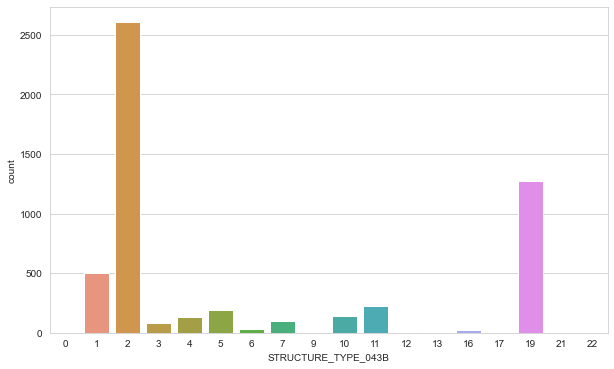

In [10]:

sns.set_style("whitegrid")
plt.ylabel('Structure Type')
plt.xlabel('Number of Bridges')

sns.countplot(x=df["STRUCTURE_TYPE_043B"]);

# Lets check the values in each of these newly created columns

In [11]:
df['BR_COD_2020'].unique()

array([  6,   4,   7,   5, 100,   8,   9,   3,   1,   2])

In [12]:
df['BR_COD_2019'].unique()

array([  6,   5,   7,   4,   8,   9,   3, 100,   1,   2])

In [13]:
df['BR_COD_2018'].unique()

array([  6,   5,   7,   4,   8,   9, 100,   3,   2,   1])

In [14]:
df['BR_COD_2017'].unique()

array([  6,   5,   7,   4,   8,   9, 100,   3,   2,   1])

In [15]:
df['BR_COD_2016'].unique()

array([  6,   5,   7,   4,   8,   9, 100,   3,   2,   1])

In [16]:
df['BR_COD_2015'].unique()

array([100,   5,   6,   7,   4,   8,   3,   9,   2,   1])

In [17]:
df['BR_COD_2014'].unique()

array([100,   5,   6,   7,   4,   8,   9,   3,   2,   1])

In [18]:
df['BR_COD_2013'].unique()

array([100,   5,   6,   7,   4,   8,   9,   3,   2,   1])

In [19]:
df['BR_COD_2012'].unique()

array([100,   5,   4,   7,   6,   8,   3,   9,   2,   1])

In [20]:
df['BR_COD_2011'].unique()

array([100,   5,   4,   7,   3,   6,   8,   9,   1,   2])

In [21]:
df['BR_COD_2010'].unique()

array([100,   5,   4,   7,   3,   6,   8,   9,   1,   2])

# Now let's drop the number 100 from our ratings because the rating must be from 1 to 9

In [22]:
# dropping 100 values
df.drop(df.index[df['BR_COD_2010'] == 100], inplace = True)
df['BR_COD_2010'].unique()

array([5, 4, 7, 3, 6, 8, 9, 1, 2])

In [23]:
df.drop(df.index[df['BR_COD_2011'] == 100], inplace = True)
df['BR_COD_2011'].unique()

array([5, 4, 7, 3, 6, 8, 9, 1, 2])

In [24]:
df.drop(df.index[df['BR_COD_2012'] == 100], inplace = True)
df['BR_COD_2012'].unique()

array([5, 4, 7, 6, 8, 3, 9, 2, 1])

In [25]:
df.drop(df.index[df['BR_COD_2013'] == 100], inplace = True)
df['BR_COD_2013'].unique()

array([5, 6, 7, 4, 8, 9, 3, 2, 1])

In [26]:
df.drop(df.index[df['BR_COD_2014'] == 100], inplace = True)
df['BR_COD_2014'].unique()

array([5, 6, 7, 4, 8, 9, 3, 2, 1])

In [27]:
df.drop(df.index[df['BR_COD_2015'] == 100], inplace = True)
df['BR_COD_2015'].unique()

array([5, 6, 7, 4, 8, 3, 9, 2, 1])

In [28]:
df.drop(df.index[df['BR_COD_2016'] == 100], inplace = True)
df['BR_COD_2016'].unique()

array([5, 6, 7, 4, 8, 9, 3, 2, 1])

In [29]:
df.drop(df.index[df['BR_COD_2017'] == 100], inplace = True)
df['BR_COD_2017'].unique()

array([5, 6, 7, 4, 8, 9, 3, 2, 1])

In [30]:
df.drop(df.index[df['BR_COD_2018'] == 100], inplace = True)
df['BR_COD_2018'].unique()

array([5, 6, 7, 4, 8, 9, 3, 2, 1])

In [31]:
df.drop(df.index[df['BR_COD_2019'] == 100], inplace = True)
df['BR_COD_2019'].unique()

array([5, 6, 7, 4, 8, 9, 3, 1, 2])

In [32]:
df.drop(df.index[df['BR_COD_2020'] == 100], inplace = True)
df['BR_COD_2020'].unique()

array([4, 6, 7, 5, 8, 9, 3, 1, 2])

# Let's define the variable "yr_in_srv" as years in service, which is the current year minus the year in which the bridge was built

In [33]:
df=df.assign(Yr_in_Srv=2022-df['YEAR_BUILT_027'])

# We define a new dataset from the existig one, considering only the values we want to consider for our analysis and model development 


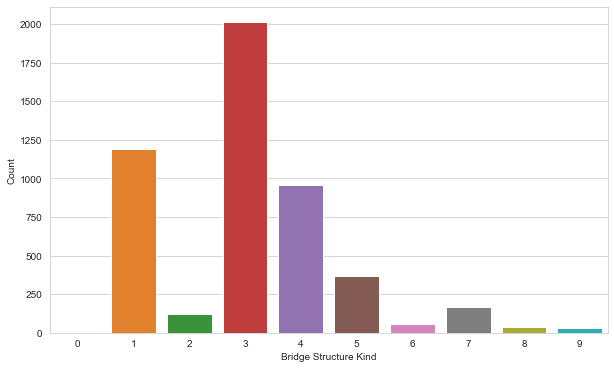

In [54]:
ax=sns.countplot(x=data["STRUCTURE_KID_043A"])
sns.set_style("whitegrid")
plt.ylabel('Count')
plt.xlabel('Bridge Structure Kind')
plt.show()

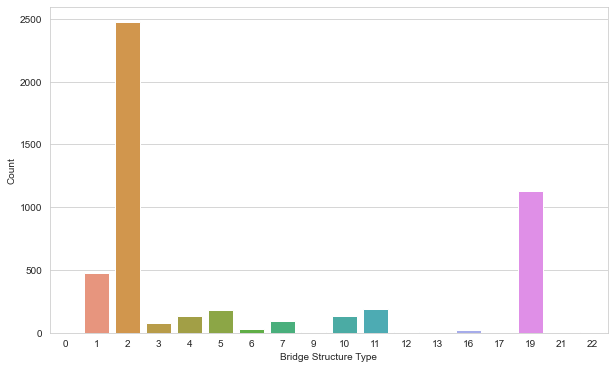

In [53]:
ax=sns.countplot(x=data["STRUCTURE_TYPE_043B"])
sns.set_style("whitegrid")
plt.ylabel('Count')
plt.xlabel('Bridge Structure Type')
plt.show()

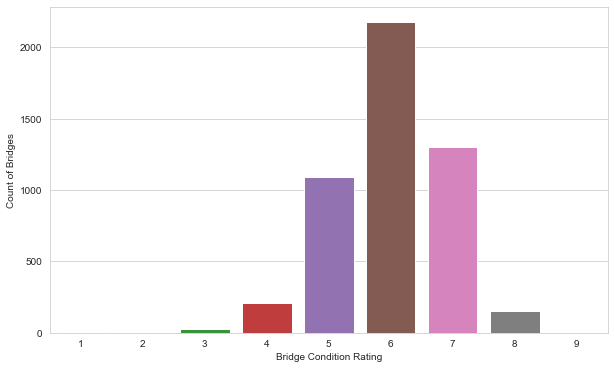

In [50]:


ax=sns.countplot(x=data["BR_COD_2021"])
ax.set(xlabel='Bridge Condition Rating', ylabel='Count of Bridges')
sns.set_style("whitegrid")
plt.ylabel('Count of Bridges')
plt.xlabel('Bridge Condition Rating')
plt.show()


In [34]:
data=df[['BR_COD_2010', 'BR_COD_2011', 'BR_COD_2012', 'BR_COD_2013', 'BR_COD_2014', 'BR_COD_2015', 'BR_COD_2016', 'BR_COD_2017',
       'BR_COD_2018', 'BR_COD_2019', 'BR_COD_2020', 'BR_COD_2021', 'LAT_016','LOG_017', 'YEAR_BUILT_027', 'ADT_029_2021', 'STRUCTURE_KID_043A', 'STRUCTURE_TYPE_043B',  
'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052', 'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109', 'Max_Temp_2010', 
 'Max_Temp_2011', 'Max_Temp_2012', 'Max_Temp_2013', 'Max_Temp_2014', 'Max_Temp_2015', 'Max_Temp_2016', 'Max_Temp_2017',  
 'Max_Temp_2018', 'Max_Temp_2019', 'Max_Temp_2020', 'Max_Temp_2021', 'Min_Tem_2010',  'Min_Tem_2011', 'Min_Tem_2012', 
 'Min_Tem_2013', 'Min_Tem_2014', 'Min_Tem_2015', 'Min_Tem_2016', 'Min_Tem_2017', 'Min_Tem_2018', 'Min_Tem_2019', 'Min_Tem_2020',  
 'Min_Tem_2021', 'Mean_Tem_2010', 'Mean_Tem_2011', 'Mean_Tem_2012', 'Mean_Tem_2013', 'Mean_Tem_2014', 'Mean_Tem_2015', 
 'Mean_Tem_2016', 'Mean_Tem_2017', 'Mean_Tem_2018', 'Mean_Tem_2019', 'Mean_Tem_2020', 'Mean_Tem_2021','Yr_in_Srv']]

In [35]:
feature= ['BR_COD_2010', 'BR_COD_2011', 'BR_COD_2012','BR_COD_2013', 'BR_COD_2014', 'BR_COD_2015','BR_COD_2016','BR_COD_2017','BR_COD_2018','BR_COD_2019','BR_COD_2020','BR_COD_2021']

In [36]:
list(enumerate(feature))

[(0, 'BR_COD_2010'),
 (1, 'BR_COD_2011'),
 (2, 'BR_COD_2012'),
 (3, 'BR_COD_2013'),
 (4, 'BR_COD_2014'),
 (5, 'BR_COD_2015'),
 (6, 'BR_COD_2016'),
 (7, 'BR_COD_2017'),
 (8, 'BR_COD_2018'),
 (9, 'BR_COD_2019'),
 (10, 'BR_COD_2020'),
 (11, 'BR_COD_2021')]

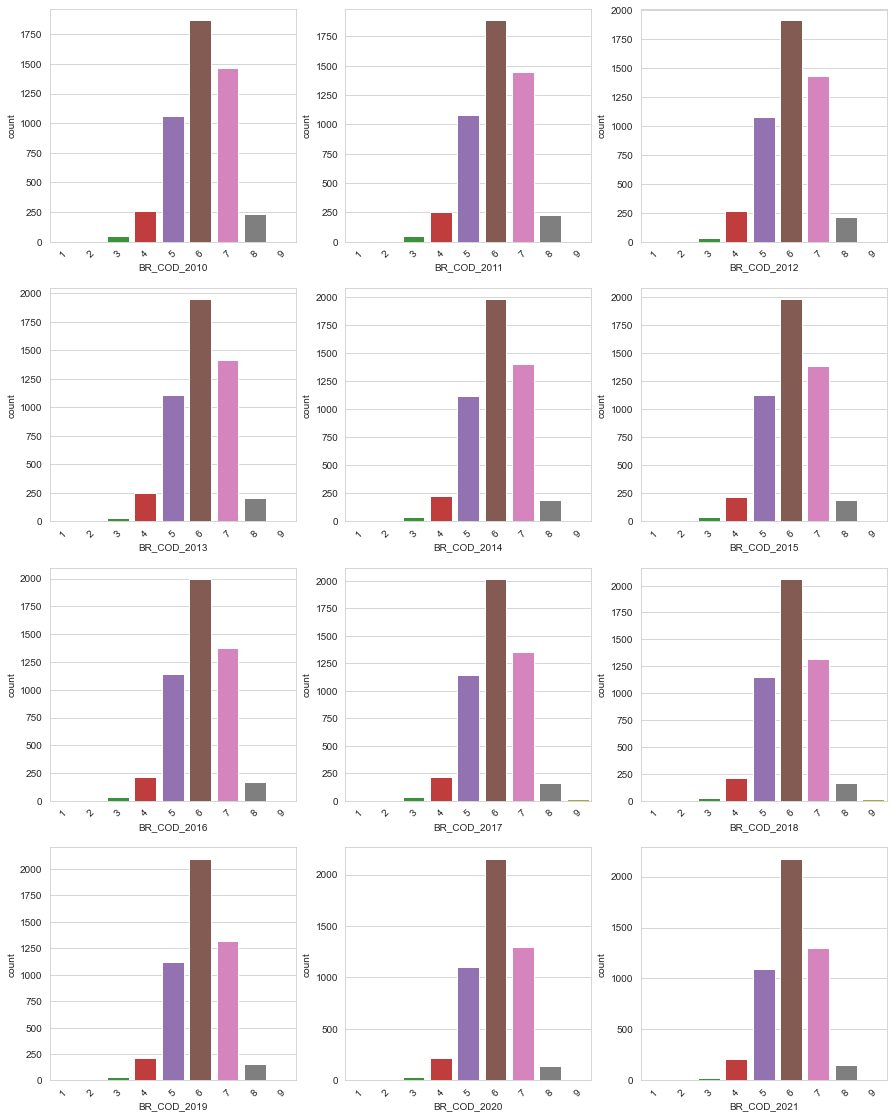

In [37]:
plt.figure(figsize = (15, 30))
for i in enumerate(feature):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1], data = data)
    plt.xticks(rotation = 45)

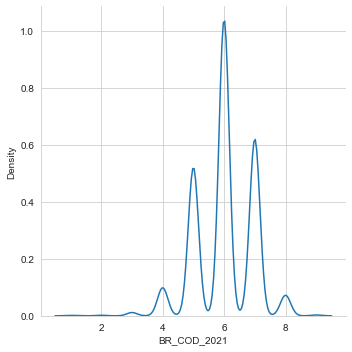

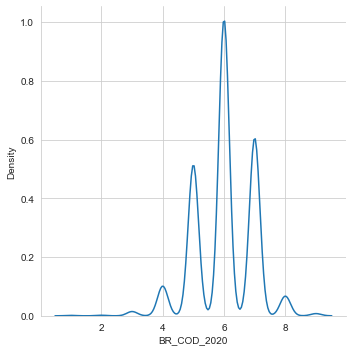

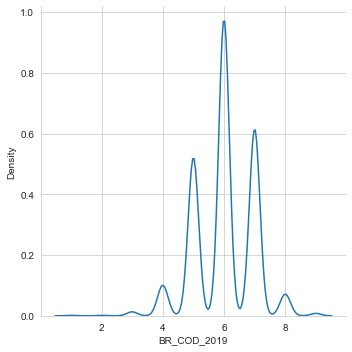

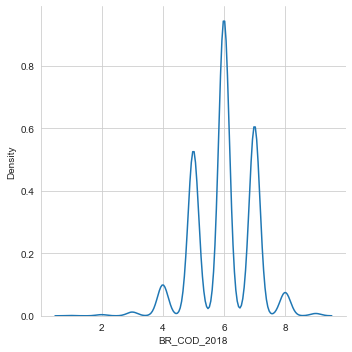

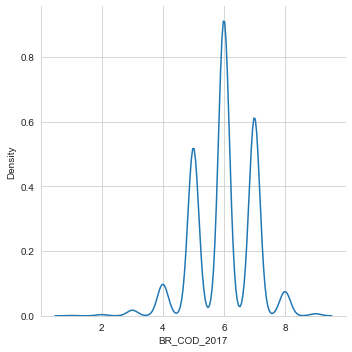

In [38]:
sns.displot(data['BR_COD_2021'], kind='kde')
plt.show()
sns.displot(data['BR_COD_2020'], kind='kde')
plt.show()
sns.displot(data['BR_COD_2019'], kind='kde')
plt.show()
sns.displot(data['BR_COD_2018'], kind='kde')
plt.show()
sns.displot(data['BR_COD_2017'], kind='kde')
plt.show()

In [37]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

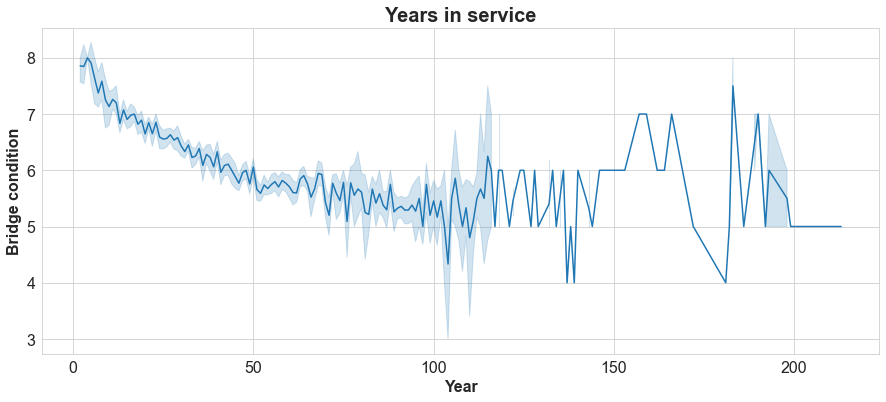

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
#df = data[data['STRUCTURE_UMBER_008']=='1MD0135']

sns.lineplot(data['Yr_in_Srv'], data['BR_COD_2021'] )
ax.set_title('Years in service', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Bridge condition', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)


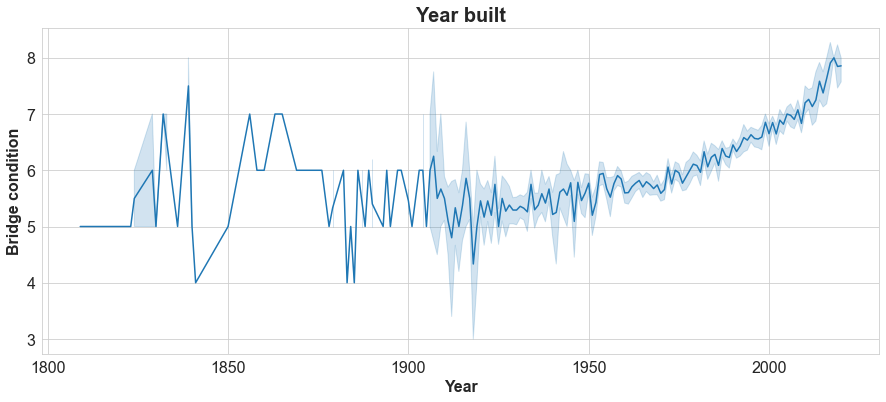

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
#df = data[data['STRUCTURE_UMBER_008']=='1MD0135']

sns.lineplot(data['YEAR_BUILT_027'], data['BR_COD_2021'] )
ax.set_title('Year built', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Bridge condition', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

Text(0, 0.5, 'YEAR_RECOSTRUCTED')

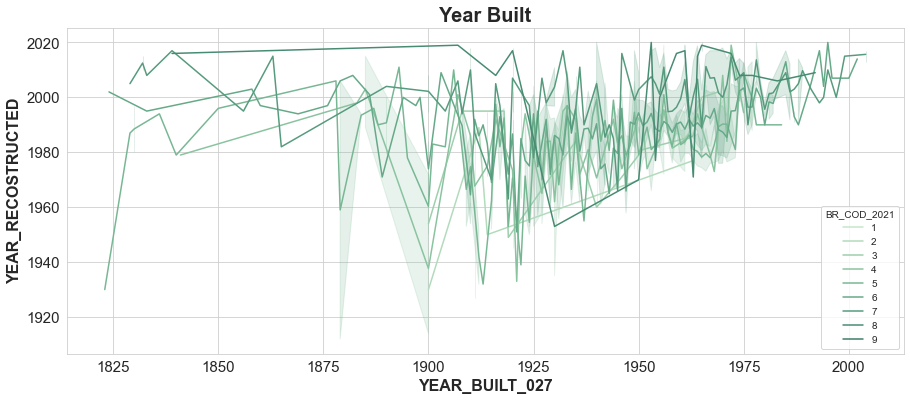

In [40]:

fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.4", 9)
sns.lineplot(data['YEAR_BUILT_027'], data['YEAR_RECOSTRUCTED_106'], hue=data['BR_COD_2021'], palette=palette)
ax.set_title('Year Built', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('YEAR_BUILT_027', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('YEAR_RECOSTRUCTED', fontsize = 16, fontdict=dict(weight='bold'))




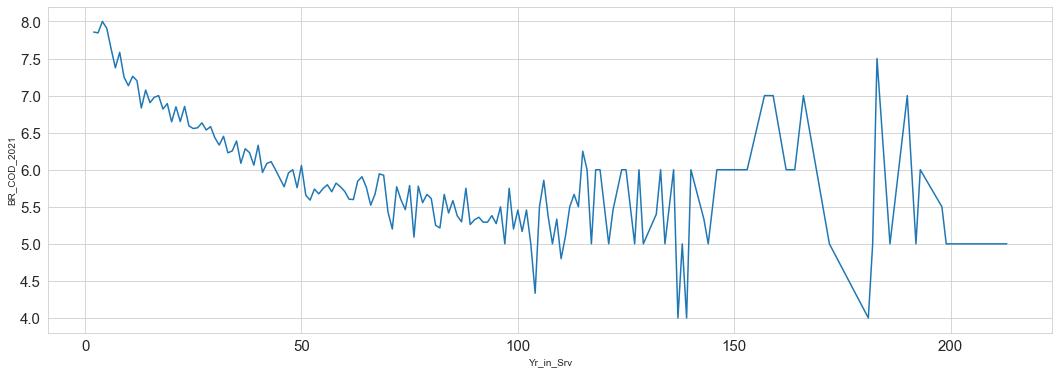

In [41]:
fig = plt.figure(figsize = (18, 6))

sns.lineplot(x = 'Yr_in_Srv', y = 'BR_COD_2021', data = data, ci = None, estimator = 'mean');

# Sensitivity analysis

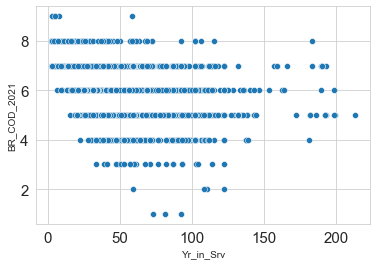

In [42]:
sns.scatterplot(x='Yr_in_Srv',y='BR_COD_2021',data=data)
ax.set_title('Relation between years in service and Bridge codition rating', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Yr_in_Srv', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('BR_COD_2021', fontsize = 16, fontdict=dict(weight='bold'))
plt.show()

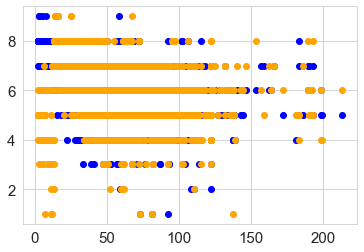

In [43]:
x=data['Yr_in_Srv']
y=data['BR_COD_2021']
z=data['BR_COD_2010']
plt.scatter(x, y, c='blue')
plt.scatter(x, z, c='orange')

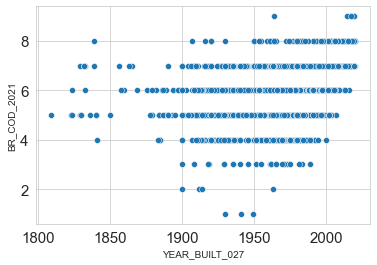

In [44]:
sns.scatterplot(x='YEAR_BUILT_027',y='BR_COD_2021',data=data)
plt.show()

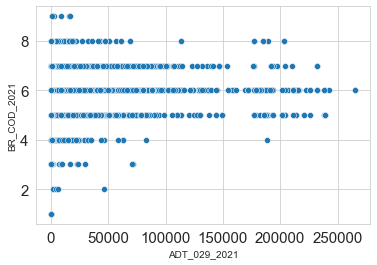

In [45]:
sns.scatterplot(x='ADT_029_2021',y='BR_COD_2021',data=data)
plt.show()

In [46]:
data['STRUCTURE_KID_043A'].unique()

array([3, 5, 1, 7, 2, 8, 4, 6, 0, 9])

In [1]:
sns.countplot(data['STRUCTURE_TYPE_043B'], data = data)


NameError: name 'sns' is not defined

<AxesSubplot:xlabel='STRUCTURE_KID_043A', ylabel='count'>

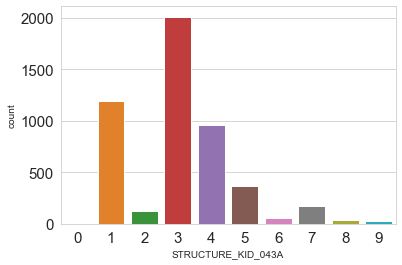

In [47]:
sns.countplot(data['STRUCTURE_KID_043A'], data = data)

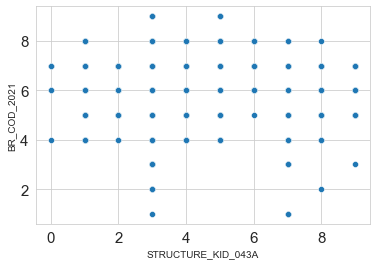

In [48]:
sns.scatterplot(x='STRUCTURE_KID_043A',y='BR_COD_2021',data=data)
plt.show()

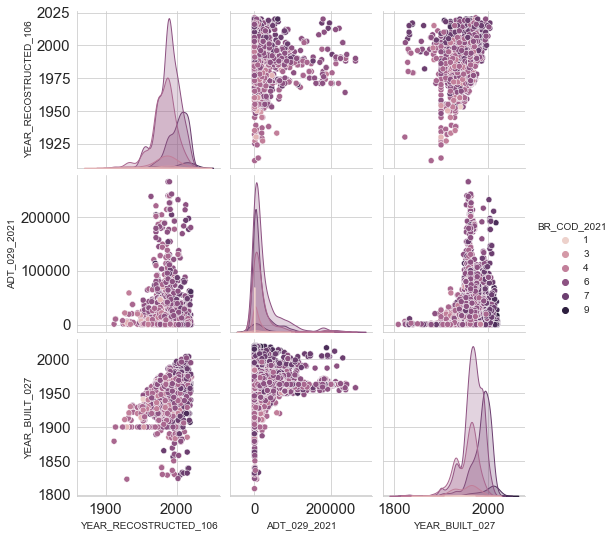

In [49]:
sns.pairplot(data=data,vars=['YEAR_RECOSTRUCTED_106', 'ADT_029_2021', 'YEAR_BUILT_027'], hue='BR_COD_2021')
plt.show()


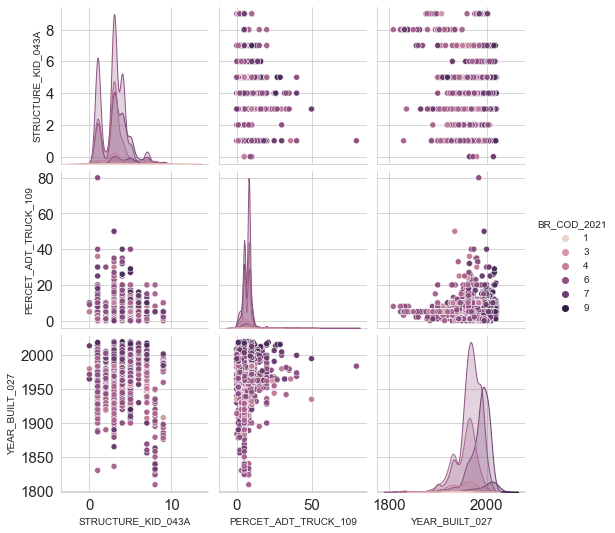

In [50]:
sns.pairplot(data=data,vars=['STRUCTURE_KID_043A', 'PERCET_ADT_TRUCK_109', 'YEAR_BUILT_027'], hue='BR_COD_2021')
plt.show()


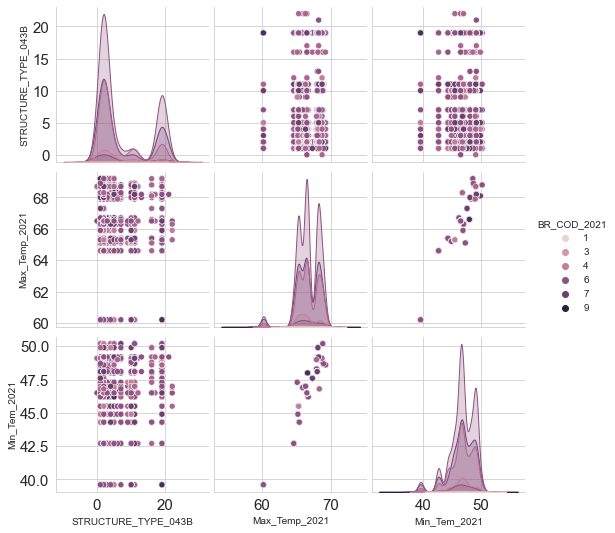

In [51]:
sns.pairplot(data=data,vars=['STRUCTURE_TYPE_043B', 'Max_Temp_2021', 'Min_Tem_2021'], hue='BR_COD_2021')
plt.show()


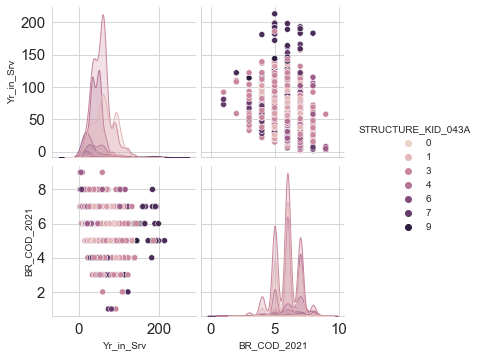

In [52]:
sns.pairplot(data=data,vars=[ 'Yr_in_Srv', 'BR_COD_2021'], hue='STRUCTURE_KID_043A')
plt.show()


# We might need to do data analysis for each year seperately, so we will create seperate data sets for each year from 2010 to 2021

**Data set for year 2021**

In [53]:
df_2021=df[['BR_COD_2021', 'LAT_016','LOG_017', 'YEAR_BUILT_027', 'ADT_029_2021', 'STRUCTURE_KID_043A', 'STRUCTURE_TYPE_043B',  
'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052', 'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109','Max_Temp_2021',  
 'Min_Tem_2021','Mean_Tem_2021','Yr_in_Srv']]
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959 entries, 1 to 5333
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BR_COD_2021            4959 non-null   int64  
 1   LAT_016                4959 non-null   int64  
 2   LOG_017                4959 non-null   int64  
 3   YEAR_BUILT_027         4959 non-null   int64  
 4   ADT_029_2021           4959 non-null   int64  
 5   STRUCTURE_KID_043A     4959 non-null   int64  
 6   STRUCTURE_TYPE_043B    4959 non-null   int64  
 7   STRUCTURE_LE_MT_049    4959 non-null   float64
 8   DECK_WIDTH_MT_052      4959 non-null   float64
 9   YEAR_RECOSTRUCTED_106  1390 non-null   float64
 10  PERCET_ADT_TRUCK_109   4957 non-null   float64
 11  Max_Temp_2021          4959 non-null   float64
 12  Min_Tem_2021           4959 non-null   float64
 13  Mean_Tem_2021          4959 non-null   float64
 14  Yr_in_Srv              4959 non-null   int64  
dtypes: f

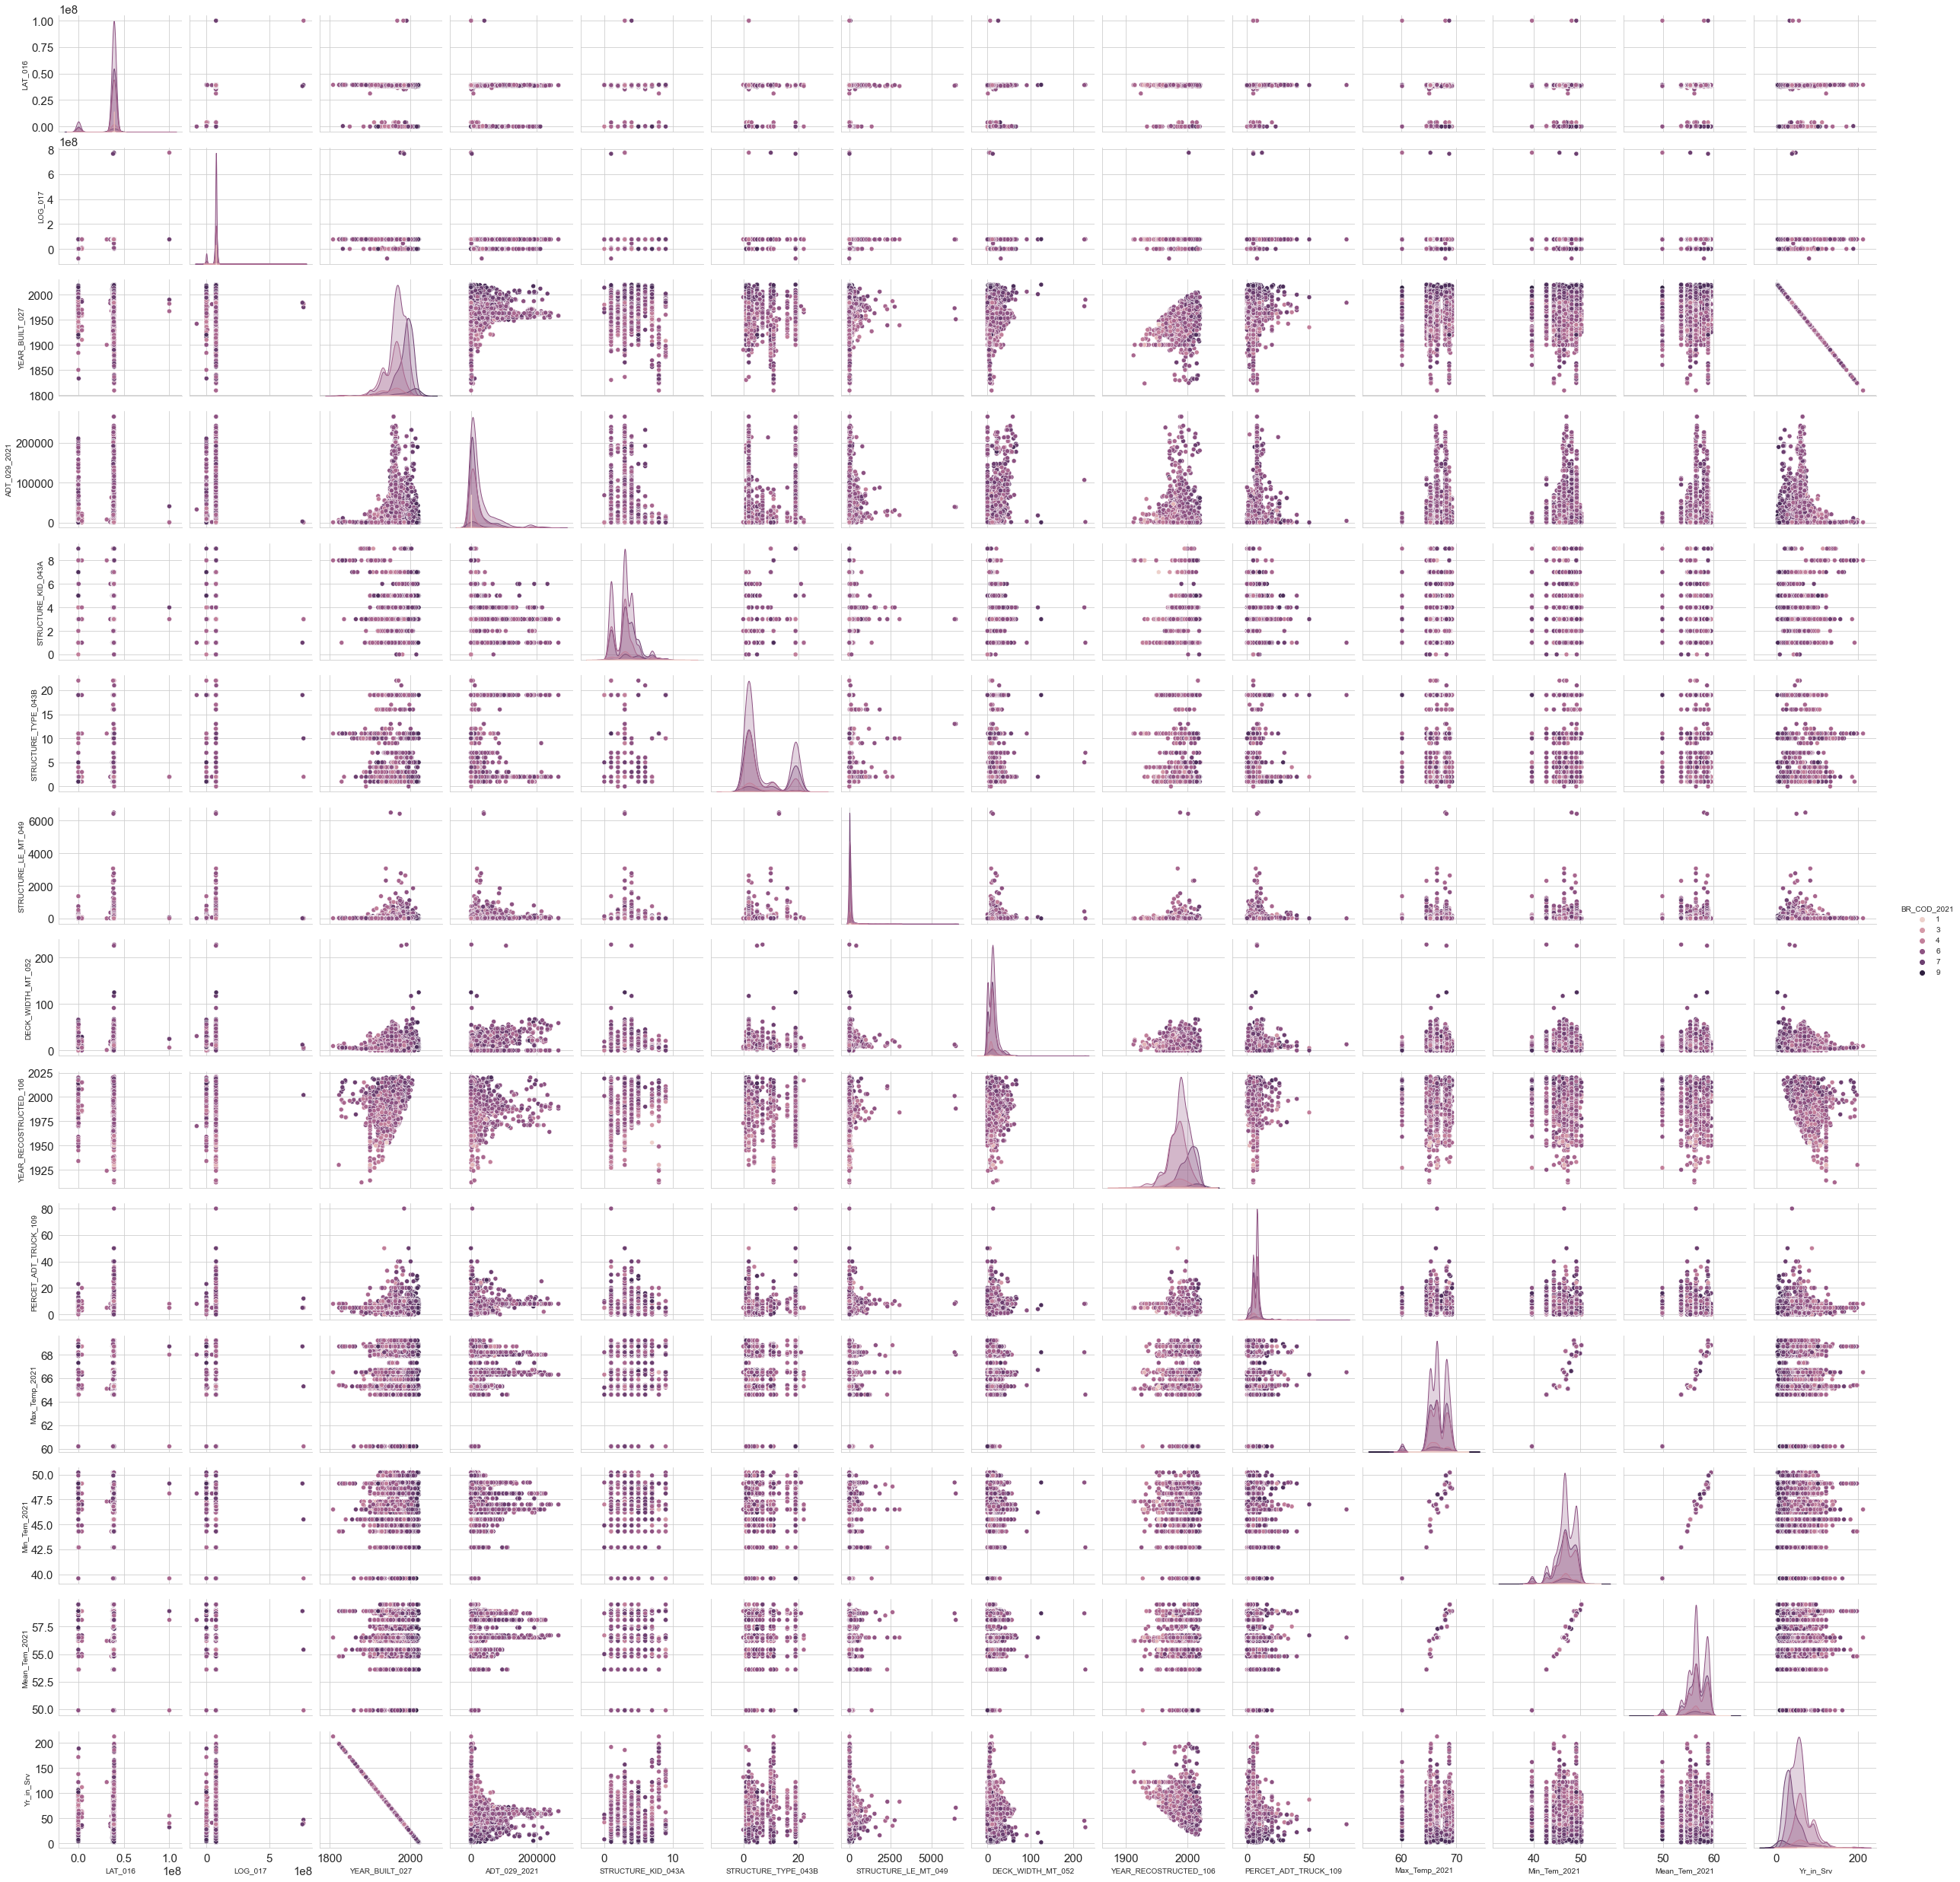

In [54]:
sns.pairplot(df_2021, hue = "BR_COD_2021")

In [55]:
#Checking for missing value
df_2021.isnull().sum()

BR_COD_2021                 0
LAT_016                     0
LOG_017                     0
YEAR_BUILT_027              0
ADT_029_2021                0
STRUCTURE_KID_043A          0
STRUCTURE_TYPE_043B         0
STRUCTURE_LE_MT_049         0
DECK_WIDTH_MT_052           0
YEAR_RECOSTRUCTED_106    3569
PERCET_ADT_TRUCK_109        2
Max_Temp_2021               0
Min_Tem_2021                0
Mean_Tem_2021               0
Yr_in_Srv                   0
dtype: int64

# **Correlation between numeric Variables**

<AxesSubplot:>

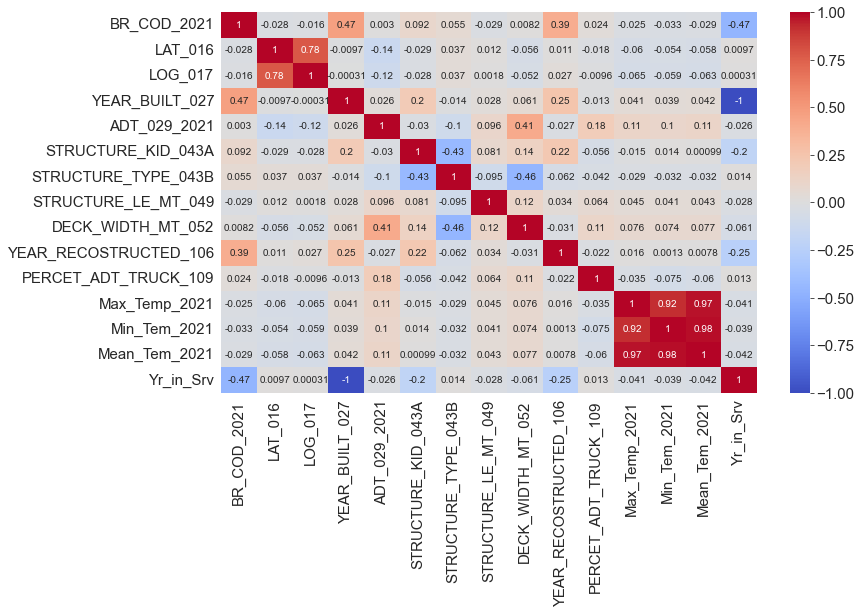

In [56]:
plt.figure(figsize = (12, 7))

sns.heatmap(df_2021.corr(), annot = True, cmap = "coolwarm")

In [57]:
#Check for categorial variables
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959 entries, 1 to 5333
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BR_COD_2021            4959 non-null   int64  
 1   LAT_016                4959 non-null   int64  
 2   LOG_017                4959 non-null   int64  
 3   YEAR_BUILT_027         4959 non-null   int64  
 4   ADT_029_2021           4959 non-null   int64  
 5   STRUCTURE_KID_043A     4959 non-null   int64  
 6   STRUCTURE_TYPE_043B    4959 non-null   int64  
 7   STRUCTURE_LE_MT_049    4959 non-null   float64
 8   DECK_WIDTH_MT_052      4959 non-null   float64
 9   YEAR_RECOSTRUCTED_106  1390 non-null   float64
 10  PERCET_ADT_TRUCK_109   4957 non-null   float64
 11  Max_Temp_2021          4959 non-null   float64
 12  Min_Tem_2021           4959 non-null   float64
 13  Mean_Tem_2021          4959 non-null   float64
 14  Yr_in_Srv              4959 non-null   int64  
dtypes: f

# Checking that no column has missing values in train or test sets


<AxesSubplot:>

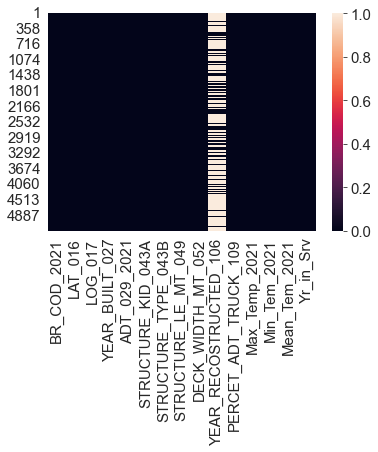

In [58]:
sns.heatmap(df_2021.isnull())

**Let's take care of the missing values in YEAR_RECOSTRUCTED_106**

In [59]:
df_2021['YEAR_BUILT_027'].unique()

array([1980, 1950, 1975, 2011, 1952, 1981, 1995, 1957, 1929, 1938, 1985,
       2007, 2008, 2005, 2010, 2004, 1930, 1933, 1994, 1948, 1947, 1932,
       1937, 1900, 1926, 1917, 1916, 1986, 2016, 1987, 1962, 1924, 1953,
       1939, 2002, 2012, 1936, 1968, 1925, 1992, 1923, 1990, 1960, 1959,
       1963, 1966, 1965, 2019, 1967, 1972, 1973, 1971, 1988, 1951, 1999,
       1997, 2003, 1958, 1983, 1949, 1998, 1991, 2006, 1954, 1920, 1946,
       1935, 1989, 1955, 1976, 1931, 1961, 1964, 1970, 1969, 1984, 1974,
       1977, 1996, 1993, 2001, 1915, 1928, 2015, 1979, 1941, 2018, 1982,
       1945, 1914, 1942, 1809, 2013, 2017, 2014, 1956, 2000, 1910, 1911,
       1921, 1927, 1922, 2020, 1934, 1940, 1944, 1889, 1912, 1840, 1978,
       1943, 1913, 1909, 2009, 1823, 1907, 1829, 1833, 1824, 1919, 1885,
       1894, 1865, 1886, 1879, 1888, 1893, 1898, 1884, 1895, 1887, 1908,
       1901, 1918, 1869, 1882, 1890, 1903, 1876, 1904, 1905, 1856, 1897,
       1906, 1860, 1878, 1883, 1839, 1863, 1830, 18

In [60]:
def impute_YEAR_RECOSTRUCTED(cols):
    YEAR_RECOSTRUCTED_106 = cols[0]
    YEAR_BUILT_027 = cols[1]
    if pd.isnull(YEAR_RECOSTRUCTED_106):
        return YEAR_BUILT_027
    else:
        return YEAR_RECOSTRUCTED_106

In [61]:
#Apply the function
df_2021['YEAR_RECOSTRUCTED_106'] = df_2021[['YEAR_RECOSTRUCTED_106','YEAR_BUILT_027']].apply(impute_YEAR_RECOSTRUCTED, axis=1)

In [62]:
print(df_2021['YEAR_RECOSTRUCTED_106'].isna().sum()) 

0


In [63]:
df_2021['PERCET_ADT_TRUCK_109'] = df_2021['PERCET_ADT_TRUCK_109'].fillna(df_2021['PERCET_ADT_TRUCK_109'].median())
print(df_2021['PERCET_ADT_TRUCK_109'].isna().sum()) 

0


# **Proposed approach**

--------------------
### **Potential techniques** :
--------------------
Since it is a regression problem we will first start with the parametric model - linear regression and Ridge Regression. 

-------------------
### **Overall solution design** : 
---------------------
The potential solution design would look like this:
* Checking the data description to get the idea of basic statistics or summary of data.
* Univariate analysis to see how data is spread out, getting to know about the outliers.
* Bivariate analysis to see how different attributes vary with the dependent variable.
* Outlier treatment if needed - In this case, outlier treatment is not necessary as outliers are the luxurious cars and in real-world scenarios, such cars would appear in data and we would want our predictive model to capture the underlying pattern for them.
* Missing value treatment using appropriate techniques.
* Feature engineering - transforming features, creating new features if possible.
* Choosing the model evaluation technique - 1) R Squared 2) RMSE can be any other metrics related to regression analysis.
* Splitting the data and proceeding with modeling.
* Model tuning to see if the performance of the model can be improved further.

-----------------
### **Measures of success** :
-----------------
R-squared and RMSE can be used as a measure of success.

R-squared: This will tell us how much variation our predictive model can explain in data.

RMSE: This will give us a measure of how far off the model is predicting the original values on average.

-------------------
### **Model Building**
------------------
1. What we want to predict is the "BR_COD". We will use the normalized version of the input variable for modeling.
2. Before we proceed to the model, we'll have to encode categorical features if there are any
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.


# OLS Model 

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

#### **Define dependent variable**


In [64]:
ind_vars = df_2021.drop(['BR_COD_2021'], axis=1);
dep_var = df_2021[['BR_COD_2021']];

 **Split the data into train and test**

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size = 0.3, random_state = 1
)

In [66]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3471
Number of rows in test data = 1488


In [67]:
# Checking that no column has missing values in train or test sets
print(x_train.isna().sum())
print('-'*30)
print(x_test.isna().sum())

LAT_016                  0
LOG_017                  0
YEAR_BUILT_027           0
ADT_029_2021             0
STRUCTURE_KID_043A       0
STRUCTURE_TYPE_043B      0
STRUCTURE_LE_MT_049      0
DECK_WIDTH_MT_052        0
YEAR_RECOSTRUCTED_106    0
PERCET_ADT_TRUCK_109     0
Max_Temp_2021            0
Min_Tem_2021             0
Mean_Tem_2021            0
Yr_in_Srv                0
dtype: int64
------------------------------
LAT_016                  0
LOG_017                  0
YEAR_BUILT_027           0
ADT_029_2021             0
STRUCTURE_KID_043A       0
STRUCTURE_TYPE_043B      0
STRUCTURE_LE_MT_049      0
DECK_WIDTH_MT_052        0
YEAR_RECOSTRUCTED_106    0
PERCET_ADT_TRUCK_109     0
Max_Temp_2021            0
Min_Tem_2021             0
Mean_Tem_2021            0
Yr_in_Srv                0
dtype: int64


 ### **Fitting a linear model - Linear Regression**
Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [68]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["BR_COD_2021"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:            BR_COD_2021   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     113.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          3.14e-255
Time:                        22:29:33   Log-Likelihood:                -4026.0
No. Observations:                3471   AIC:                             8080.
Df Residuals:                    3457   BIC:                             8166.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.578e-

#Both the R-squared and Adjusted R squared of our model are very low. This is a clear indication that we have been able to create not a very good model.
To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
Before we move on to assumption testing, we'll do a quick performance check on the test data. 

In [69]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(model, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = model.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["BR_COD_2021"]

    # Prediction on test data
    y_pred_test_pricelog = model.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["BR_COD_2021"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, x_train, x_test)  # High Overfitting.

    Data        RMSE         MAE         MAPE
0  Train  486.401136  440.922487  7260.267480
1   Test  492.062304  446.110402  7273.789101


**Checking the Linear Regression Assumptions**

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

**Checking Assumption 1: No Multicollinearity**

- We will use VIF, to check if there is multicollinearity in the data.

- Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5.

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train))

                  feature          VIF
0                   const     0.000000
1                 LAT_016     2.730624
2                 LOG_017     2.715377
3          YEAR_BUILT_027          inf
4            ADT_029_2021     1.288772
5      STRUCTURE_KID_043A     1.456497
6     STRUCTURE_TYPE_043B     1.593284
7     STRUCTURE_LE_MT_049     1.027789
8       DECK_WIDTH_MT_052     1.496396
9   YEAR_RECOSTRUCTED_106     1.601015
10   PERCET_ADT_TRUCK_109     1.081563
11          Max_Temp_2021   799.905310
12           Min_Tem_2021  1326.121924
13          Mean_Tem_2021  3988.586355
14              Yr_in_Srv          inf


- There are a few variables with high VIF.
- Our current model is complex. Let us first define a new variable Range_temp as the max_temp-Min_temp and then delete the Max_temp, Min_temp and Mean_temp columns.
- This wouldn't essentially reduce multicollinearity in the data, but it will help us make the dataset more manageable

In [71]:
#Defining the Range_temp_2021 variable 
df_2021=df_2021.assign(Range_temp_2021=df_2021['Max_Temp_2021']-df_2021['Min_Tem_2021'])

In [72]:
# Dropping the Yr_in_srv variable 
#df_2021 = df_2021.drop(['Yr_in_Srv'], axis = 1)
#df_2021 = df_2021.drop(['Max_Temp_2021'], axis = 1)
#df_2021 = df_2021.drop(['Min_Tem_2021'], axis = 1)
df_2021 = df_2021.drop(['Mean_Tem_2021'], axis = 1)

In [73]:
#Try the model again

ind_vars = df_2021.drop(['BR_COD_2021'], axis = 1)
dep_var = df_2021[['BR_COD_2021']]
# Splitting data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size = 0.3, random_state = 1
)


print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0], "\n\n")

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)

# Fit linear model on new dataset
olsmodel2 = build_ols_model(x_train)
print(olsmodel2.summary())

Number of rows in train data = 3471
Number of rows in test data = 1488 


                            OLS Regression Results                            
Dep. Variable:            BR_COD_2021   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     122.7
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.36e-255
Time:                        22:29:33   Log-Likelihood:                -4027.6
No. Observations:                3471   AIC:                             8081.
Df Residuals:                    3458   BIC:                             8161.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [74]:
# Check VIF
print(checking_vif(x_train))

                  feature       VIF
0                   const  0.000000
1                 LAT_016  2.730342
2                 LOG_017  2.715086
3          YEAR_BUILT_027       inf
4            ADT_029_2021  1.265658
5      STRUCTURE_KID_043A  1.456002
6     STRUCTURE_TYPE_043B  1.592812
7     STRUCTURE_LE_MT_049  1.026946
8       DECK_WIDTH_MT_052  1.495456
9   YEAR_RECOSTRUCTED_106  1.600680
10   PERCET_ADT_TRUCK_109  1.067976
11          Max_Temp_2021       inf
12           Min_Tem_2021       inf
13              Yr_in_Srv       inf
14        Range_temp_2021       inf


In [75]:
# Checking model performance
model_pref(olsmodel2, x_train, x_test)  # No Overfitting.

    Data        RMSE         MAE         MAPE
0  Train  486.168825  440.808921  7259.077138
1   Test  490.322817  445.026194  7257.906274


#### **Checking Assumption 2: Mean of residuals should be 0**

In [76]:
residuals = olsmodel2.resid
np.mean(residuals)

1.1798366630807656e-14

 - Mean of redisuals is no where close to 0. The second assumption is not satisfied.

 **Checking Assumption 3: No Heteroscedasticity**
 * Homoscedacity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

We'll use **`Goldfeldquandt Test`** to test the following hypothesis

> **Null hypothesis: Residuals are homoscedastic**

> **Alternate hypothesis: Residuals have heteroscedasticity**

> **alpha = 0.05** 

In [77]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.973261250537795), ('p-value', 0.7130533329774174)]

Since the p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

Assumptions 3 is satisfied by our olsmodel3.

**Checking Assumption 4: Linearity of variables**

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

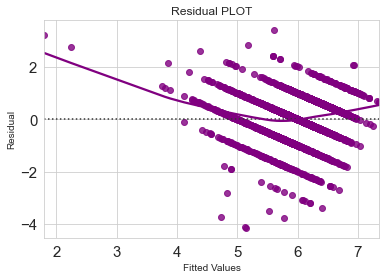

In [78]:
# Predicted values
fitted = olsmodel2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color = "purple", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

- Assumptions 4 is not satisfied by our olsmodel2. 

**Checking Assumption 5: Normality of error terms**

The residuals should be normally distributed.

<AxesSubplot:ylabel='Density'>

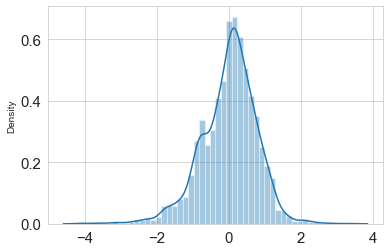

In [79]:
# Plot histogram of residuals
sns.distplot(residuals)

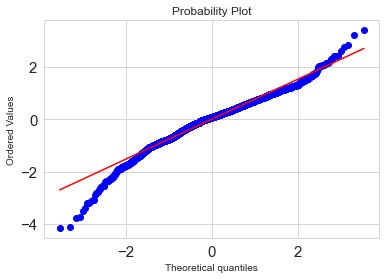

In [80]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

 - The residuals have a close to normal distribution. Assumption 5 is satisfied.
- We should further investigate these values in the tails where we have made huge residual errors.

**Now that we have seen that olsmodel2 does not follow all the linear regression assumptions. Let us use different model.**

# Non-Linear Models

In [81]:
#Let's look at the data one more time 
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4959 entries, 1 to 5333
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BR_COD_2021            4959 non-null   int64  
 1   LAT_016                4959 non-null   int64  
 2   LOG_017                4959 non-null   int64  
 3   YEAR_BUILT_027         4959 non-null   int64  
 4   ADT_029_2021           4959 non-null   int64  
 5   STRUCTURE_KID_043A     4959 non-null   int64  
 6   STRUCTURE_TYPE_043B    4959 non-null   int64  
 7   STRUCTURE_LE_MT_049    4959 non-null   float64
 8   DECK_WIDTH_MT_052      4959 non-null   float64
 9   YEAR_RECOSTRUCTED_106  4959 non-null   float64
 10  PERCET_ADT_TRUCK_109   4959 non-null   float64
 11  Max_Temp_2021          4959 non-null   float64
 12  Min_Tem_2021           4959 non-null   float64
 13  Yr_in_Srv              4959 non-null   int64  
 14  Range_temp_2021        4959 non-null   float64
dtypes: f

In [82]:
df['BR_COD_2021'].value_counts()

6    2176
7    1299
5    1090
4     206
8     151
3      24
9       6
2       4
1       3
Name: BR_COD_2021, dtype: int64

** There were only 3 bridge in 2021 that are rated 1 and 4 that was rated 2. 

### **Statistical Summary**

Since the predictor variables in this machine learning problem are all numerical, a **statistical summary** is definitely required so that we can understand some of the statistical properties of the features of our dataset.

In [83]:
# We would like the format of the values in the table to be simple float numbers with 5 decimal places, hence the code below
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Let's view the statistical summary of the columns in the dataset
df_2021.describe().T

count           mean            std  \
BR_COD_2021           4959.00000        6.00282        0.92323   
LAT_016               4959.00000 36005905.72111 10639730.41101   
LOG_017               4959.00000 71103139.76729 26878942.57203   
YEAR_BUILT_027        4959.00000     1968.82799       26.96792   
ADT_029_2021          4959.00000    21958.27405    37945.04984   
STRUCTURE_KID_043A    4959.00000        3.08066        1.59743   
STRUCTURE_TYPE_043B   4959.00000        6.73926        7.12486   
STRUCTURE_LE_MT_049   4959.00000       60.40940      189.02098   
DECK_WIDTH_MT_052     4959.00000       11.79502       10.81443   
YEAR_RECOSTRUCTED_106 4959.00000     1980.32083       21.72280   
PERCET_ADT_TRUCK_109  4959.00000        6.85441        3.60065   
Max_Temp_2021         4959.00000       66.58709        1.67237   
Min_Tem_2021          4959.00000       46.72142        2.08846   
Yr_in_Srv             4959.00000       53.17201       26.96792   
Range_temp_2021       4959.00000       19.86568        0.86800   

                                  min            25%            50%  \
BR_COD_2021                   1.00000        5.00000        6.00000   
LAT_016                      -1.00000 38575290.50000 39161614.00000   
LOG_017               -76878749.00000 76244003.50000 76465124.00000   
YEAR_BUILT_027             1809.00000     1957.00000     1971.00000   
ADT_029_2021                  0.00000     1105.00000     7111.00000   
STRUCTURE_KID_043A            0.00000        2.00000        3.00000   
STRUCTURE_TYPE_043B           0.00000        2.00000        2.00000   
STRUCTURE_LE_MT_049           6.10000       11.30000       24.70000   
DECK_WIDTH_MT_052             0.00000        6.10000       10.70000   
YEAR_RECOSTRUCTED_106      1809.00000     1968.00000     1984.00000   
PERCET_ADT_TRUCK_109          0.00000        5.00000        8.00000   
Max_Temp_2021                60.20000       65.40000       66.50000   
Min_Tem_2021                 39.60000       45.50000       46.80000   
Yr_in_Srv                     2.00000       33.00000       51.00000   
Range_temp_2021              17.80000       19.30000       19.90000   

                                 75%             max  
BR_COD_2021                  7.00000         9.00000  
LAT_016               39308510.00000  99999999.00000  
LOG_017               77102579.50000 772802784.00000  
YEAR_BUILT_027            1989.00000      2020.00000  
ADT_029_2021             23201.00000    265320.00000  
STRUCTURE_KID_043A           4.00000         9.00000  
STRUCTURE_TYPE_043B         11.00000        22.00000  
STRUCTURE_LE_MT_049         61.45000      6488.90000  
DECK_WIDTH_MT_052           15.10000       228.00000  
YEAR_RECOSTRUCTED_106     1995.00000      2021.00000  
PERCET_ADT_TRUCK_109         8.00000        80.00000  
Max_Temp_2021               68.00000        69.20000  
Min_Tem_2021                48.10000        50.20000  
Yr_in_Srv                   65.00000       213.00000  
Range_temp_2021             20.30000        21.90000

 ## **Exploratory Data Analysis**


### **Univariate Analysis**

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [84]:
# Defining the hist_box() function
def hist_box(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15,10))
  sns.set(style='darkgrid')
  # Adding a graph in each part
  sns.boxplot(df_2021[col], ax=ax_box, showmeans=True)
  sns.distplot(df_2021[col], ax=ax_hist)
  ax_hist.axvline(df_2021[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(df_2021[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
  plt.show()

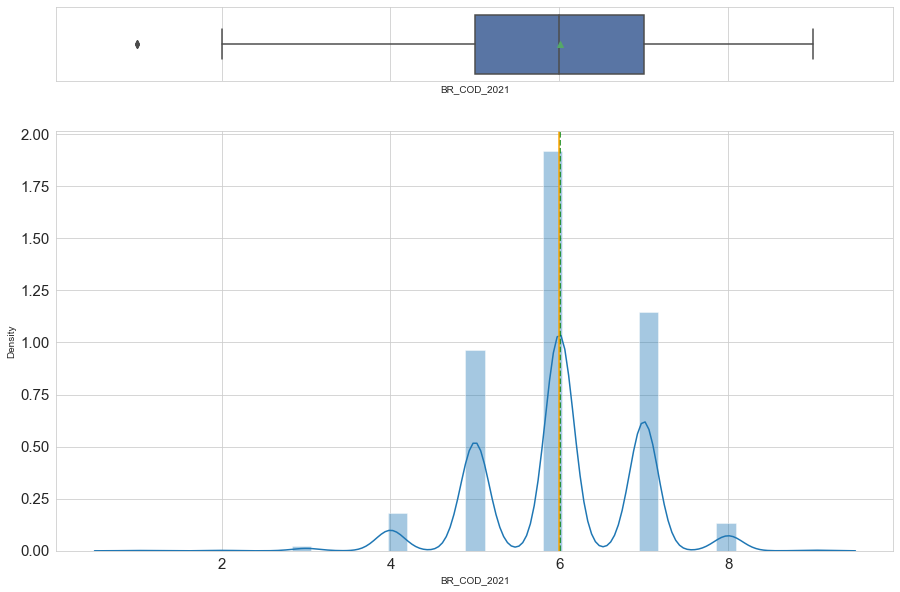

In [85]:
hist_box('BR_COD_2021')

In [86]:
#Checking for the boundaries to delete the outliers,
df_2021[df_2021['BR_COD_2021']<1]


Empty DataFrame
Columns: [BR_COD_2021, LAT_016, LOG_017, YEAR_BUILT_027, ADT_029_2021, STRUCTURE_KID_043A, STRUCTURE_TYPE_043B, STRUCTURE_LE_MT_049, DECK_WIDTH_MT_052, YEAR_RECOSTRUCTED_106, PERCET_ADT_TRUCK_109, Max_Temp_2021, Min_Tem_2021, Yr_in_Srv, Range_temp_2021]
Index: []

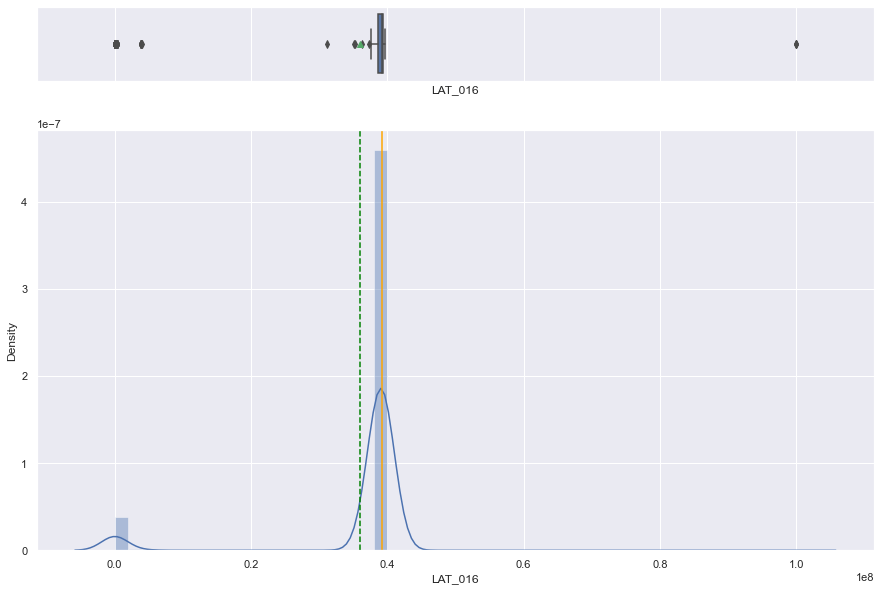

In [87]:
hist_box('LAT_016')

In [88]:
df_2021[df_2021['LAT_016']<38]


BR_COD_2021  LAT_016  LOG_017  YEAR_BUILT_027  ADT_029_2021  \
66              5        0        0            1925           281   
963             6        0        0            1968          6802   
3657            7        0        0            1992          1000   
4676            4        0        0            1955           100   
4895            6       -1       -7            1994           275   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
66                     1                   11             25.90000   
963                    4                    2             33.50000   
3657                   1                   19              9.40000   
4676                   7                    2             11.30000   
4895                   7                    1              7.30000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
66              8.30000             1925.00000               8.00000   
963            13.40000             1968.00000               8.00000   
3657            0.00000             1992.00000               5.00000   
4676            6.10000             1955.00000               8.00000   
4895            7.10000             1994.00000               5.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
66         64.60000      42.70000         97         21.90000  
963        65.10000      47.30000         54         17.80000  
3657       65.30000      45.50000         30         19.80000  
4676       66.50000      46.50000         67         20.00000  
4895       66.70000      46.20000         28         20.50000

In [89]:
# Dropping observaions with LAT_016 Less than 0.2. There are only 4 of them. 
df_2021.drop(index=df_2021[ (df_2021.LAT_016<38)].index,inplace=True)


In [90]:
df_2021[df_2021['LAT_016']<38]


Empty DataFrame
Columns: [BR_COD_2021, LAT_016, LOG_017, YEAR_BUILT_027, ADT_029_2021, STRUCTURE_KID_043A, STRUCTURE_TYPE_043B, STRUCTURE_LE_MT_049, DECK_WIDTH_MT_052, YEAR_RECOSTRUCTED_106, PERCET_ADT_TRUCK_109, Max_Temp_2021, Min_Tem_2021, Yr_in_Srv, Range_temp_2021]
Index: []

In [91]:
df_2021[df_2021['LAT_016']>40000000]

BR_COD_2021   LAT_016    LOG_017  YEAR_BUILT_027  ADT_029_2021  \
1891            5  99999999   76570977            1967          1131   
2928            7  99999999   76474276            1990         40600   
3759            5  99999999  772802784            1982           106   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
1891                   3                    2             49.70000   
2928                   4                    2             74.80000   
3759                   3                    2              8.80000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
1891           25.00000             1967.00000               8.00000   
2928           24.80000             1990.00000               5.00000   
3759            6.10000             1982.00000               5.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
1891       68.00000      48.10000         55         19.90000  
2928       68.70000      49.10000         32         19.60000  
3759       60.20000      39.60000         40         20.60000

In [92]:
df_2021.drop(index=df_2021[(df_2021.LAT_016>40000000)].index,inplace=True)

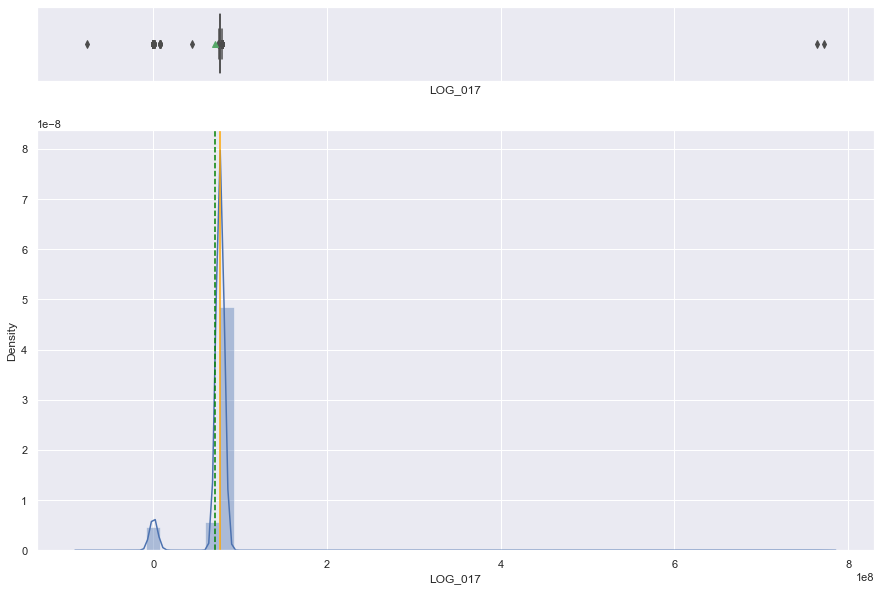

In [93]:
hist_box('LOG_017')

In [94]:
df_2021[df_2021['LOG_017']>400000000]


BR_COD_2021   LAT_016    LOG_017  YEAR_BUILT_027  ADT_029_2021  \
3675            7  39213919  772207060            1975           781   
4713            7  38201237  763755998            1984          2500   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
3675                   3                   10             25.00000   
4713                   1                   19             15.90000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
3675            3.70000             2002.00000              12.00000   
4713           12.20000             1984.00000               5.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
3675       65.30000      45.50000         47         19.80000  
4713       68.70000      49.10000         38         19.60000

In [95]:
# Dropping observaions with LAT_016 Less than 0.2. There are only 4 of them. 
df_2021.drop(index=df_2021[ (df_2021.LOG_017>400000000)].index,inplace=True)


In [96]:
df_2021[df_2021['LOG_017']<-7]


BR_COD_2021  LAT_016   LOG_017  YEAR_BUILT_027  ADT_029_2021  \
1847            6       39 -76878749            1942         32660   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
1847                   1                   19              6.70000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
1847           30.90000             1970.00000               8.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
1847       68.00000      48.10000         80         19.90000

In [97]:
df_2021.drop(index=df_2021[ (df_2021.LOG_017<-7)].index,inplace=True)


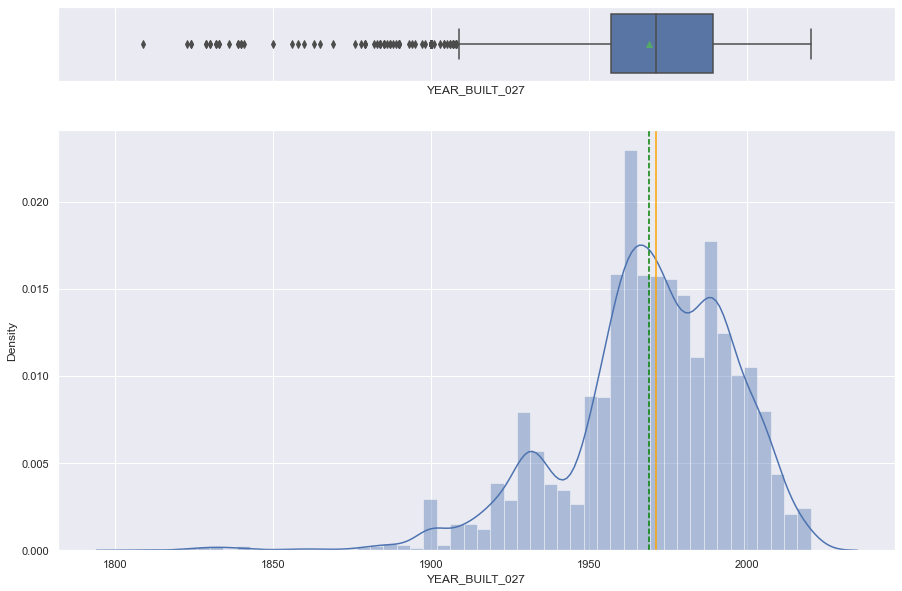

In [98]:
hist_box('YEAR_BUILT_027')

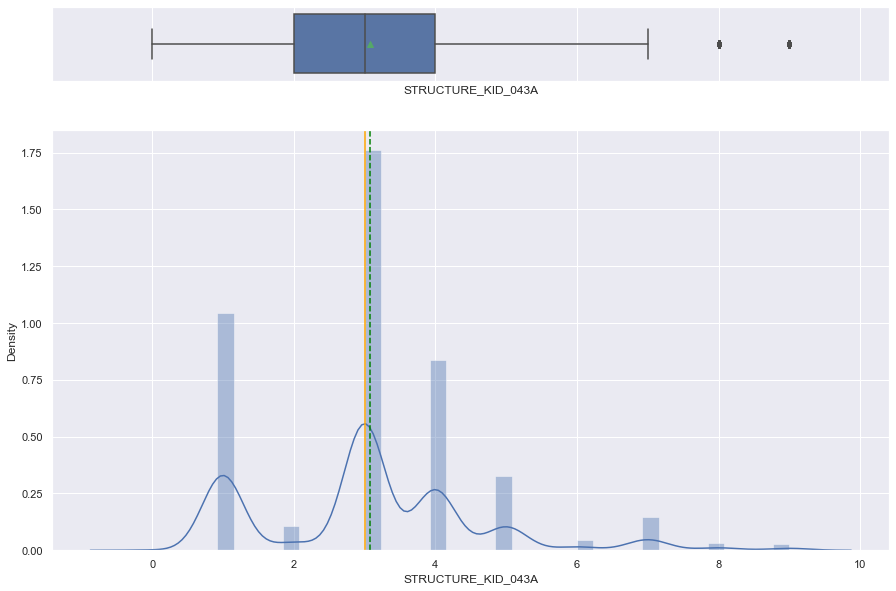

In [99]:
hist_box('STRUCTURE_KID_043A')

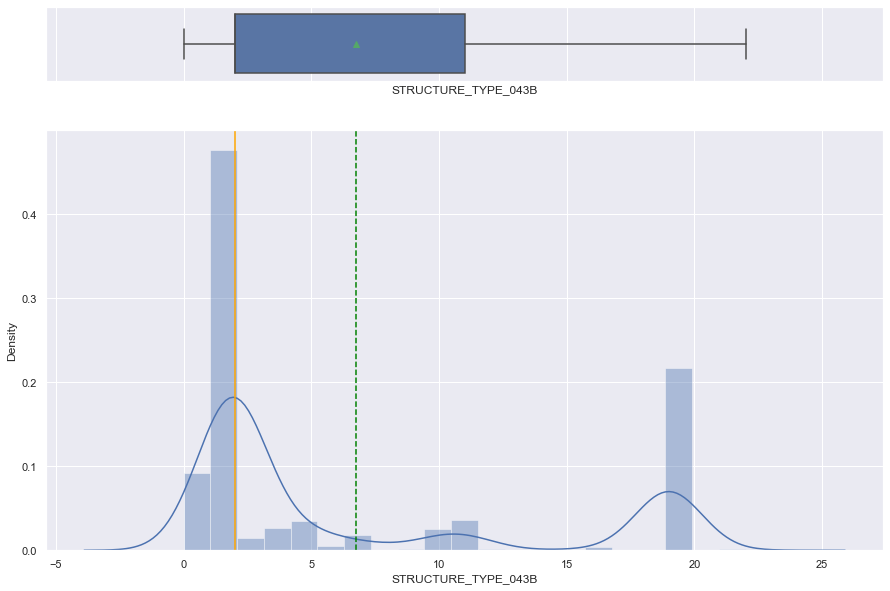

In [100]:
hist_box('STRUCTURE_TYPE_043B')

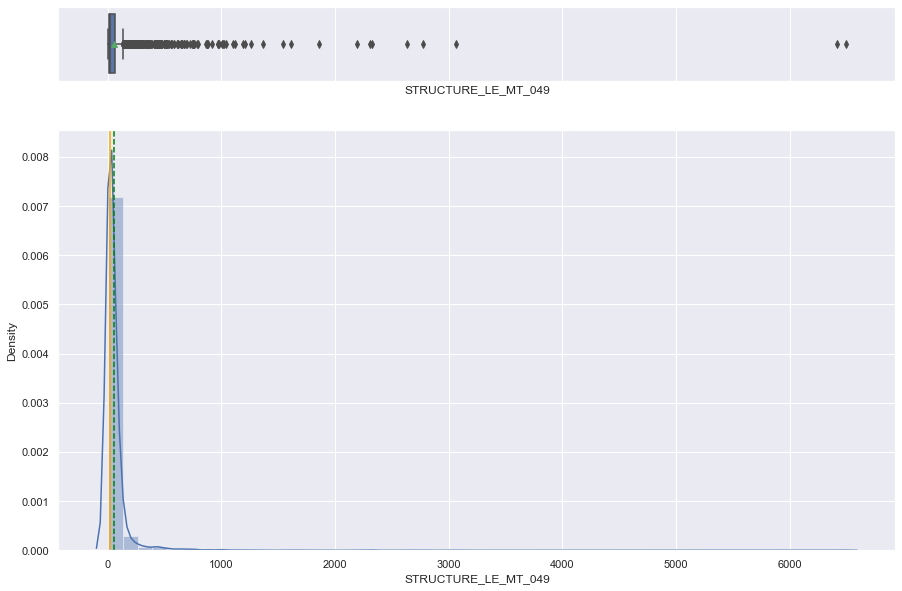

In [101]:
hist_box('STRUCTURE_LE_MT_049')

In [102]:
df_2021[df_2021['STRUCTURE_LE_MT_049']>3500]


BR_COD_2021   LAT_016   LOG_017  YEAR_BUILT_027  ADT_029_2021  \
4945            6  39003011  76241497            1951         38583   
4946            6  38590433  76202400            1973         39114   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
4945                   3                   13           6488.90000   
4946                   3                   13           6417.30000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
4945            9.50000             1988.00000               9.00000   
4946           12.50000             2001.00000               8.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
4945       68.00000      48.10000         71         19.90000  
4946       68.20000      49.20000         49         19.00000

In [103]:
df_2021.drop(index=df_2021[ (df_2021.STRUCTURE_LE_MT_049>3500)].index,inplace=True)


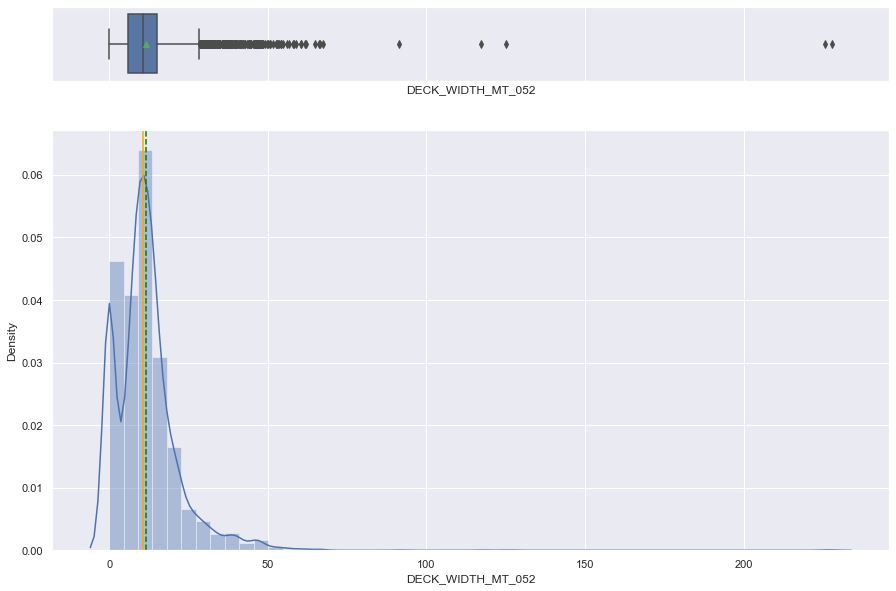

In [104]:
hist_box('DECK_WIDTH_MT_052')

In [105]:
df_2021[df_2021['DECK_WIDTH_MT_052']>150]


BR_COD_2021   LAT_016   LOG_017  YEAR_BUILT_027  ADT_029_2021  \
154             6  39402444  78430002            1990          1189   
5024            6  39161127  76381082            1977        106447   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
154                    1                    7             12.00000   
5024                   4                    5            429.20000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
154           228.00000             1990.00000               8.00000   
5024          225.60000             1977.00000               8.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
154        64.60000      42.70000         32         21.90000  
5024       68.20000      49.20000         45         19.00000

In [106]:
df_2021.drop(index=df_2021[ (df_2021.DECK_WIDTH_MT_052>150)].index,inplace=True)


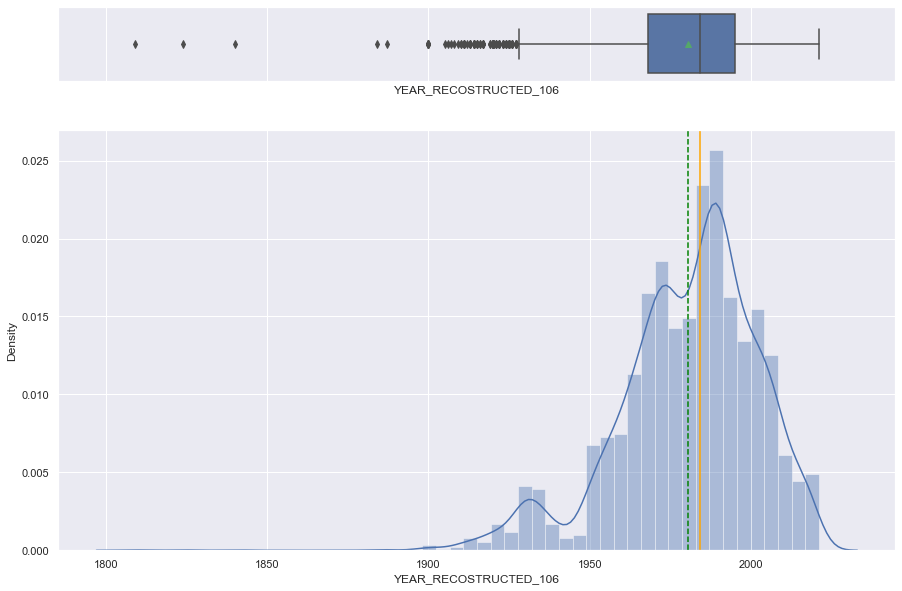

In [107]:
hist_box('YEAR_RECOSTRUCTED_106')

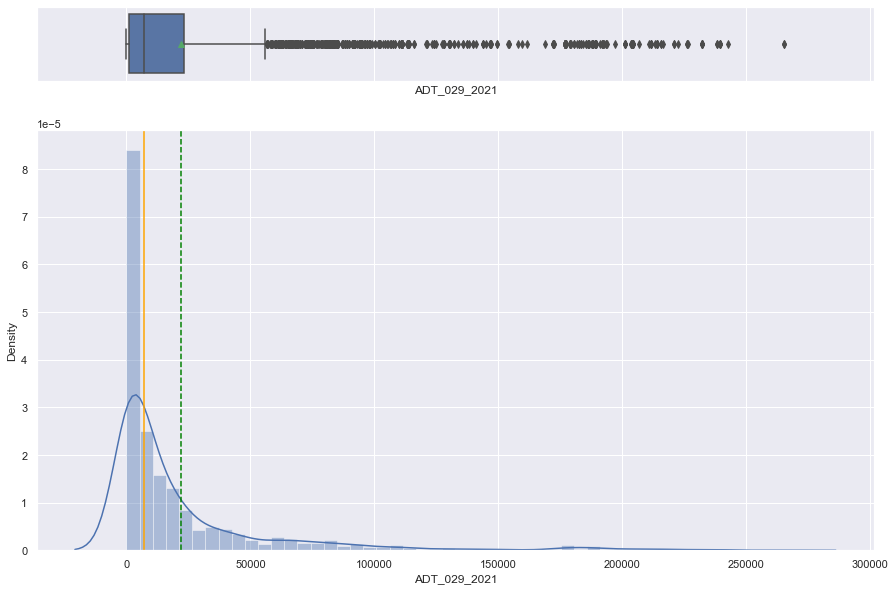

In [108]:
hist_box('ADT_029_2021')

In [109]:
df_2021[df_2021['ADT_029_2021']>250000]


BR_COD_2021   LAT_016   LOG_017  YEAR_BUILT_027  ADT_029_2021  \
1658            6  39021970  77084519            1958        265320   
1659            6  39021613  77084324            1958        265320   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
1658                   1                   19              6.40000   
1659                   3                    2             31.40000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
1658            0.00000             1988.00000               8.00000   
1659           58.90000             1990.00000               8.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
1658       66.30000      47.00000         64         19.30000  
1659       66.30000      47.00000         64         19.30000

In [110]:
df_2021.drop(index=df_2021[ (df_2021.ADT_029_2021>250000)].index,inplace=True)


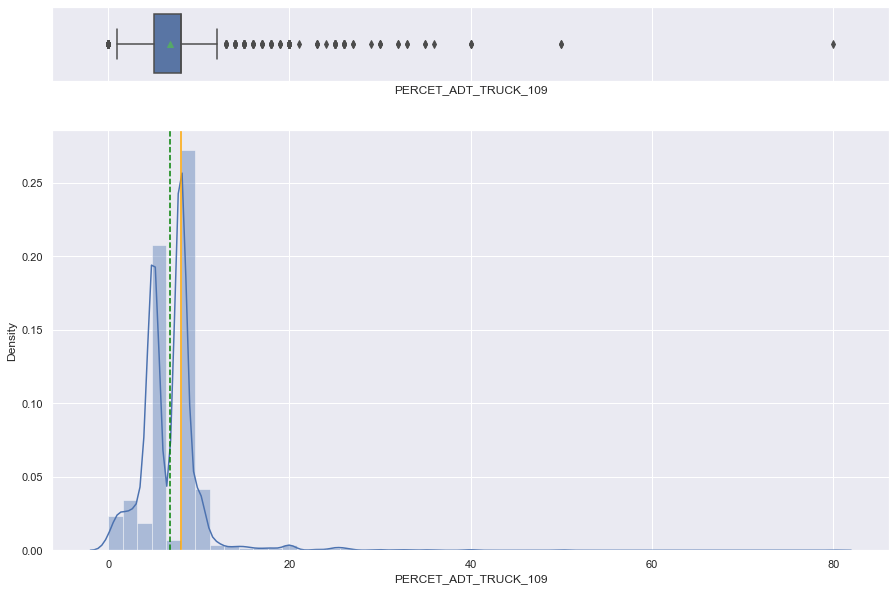

In [111]:
hist_box('PERCET_ADT_TRUCK_109')

In [112]:
df_2021[df_2021['PERCET_ADT_TRUCK_109']>40]


BR_COD_2021   LAT_016   LOG_017  YEAR_BUILT_027  ADT_029_2021  \
2812            6  39220371  76521703            1984          4050   
4121            4  39160271  76474545            1935            45   
4150            7  39104536  76452543            1995            50   

      STRUCTURE_KID_043A  STRUCTURE_TYPE_043B  STRUCTURE_LE_MT_049  \
2812                   1                   19             11.30000   
4121                   3                    2             11.60000   
4150                   3                   19             12.30000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
2812           13.10000             1984.00000              80.00000   
4121            5.20000             1984.00000              50.00000   
4150            0.00000             1995.00000              50.00000   

      Max_Temp_2021  Min_Tem_2021  Yr_in_Srv  Range_temp_2021  
2812       66.50000      46.50000         38         20.00000  
4121       66.30000      47.00000         87         19.30000  
4150       66.30000      47.00000         27         19.30000

In [113]:
df_2021.drop(index=df_2021[ (df_2021.PERCET_ADT_TRUCK_109>40)].index,inplace=True)


In [114]:
df_2021[df_2021['PERCET_ADT_TRUCK_109']<0]


Empty DataFrame
Columns: [BR_COD_2021, LAT_016, LOG_017, YEAR_BUILT_027, ADT_029_2021, STRUCTURE_KID_043A, STRUCTURE_TYPE_043B, STRUCTURE_LE_MT_049, DECK_WIDTH_MT_052, YEAR_RECOSTRUCTED_106, PERCET_ADT_TRUCK_109, Max_Temp_2021, Min_Tem_2021, Yr_in_Srv, Range_temp_2021]
Index: []

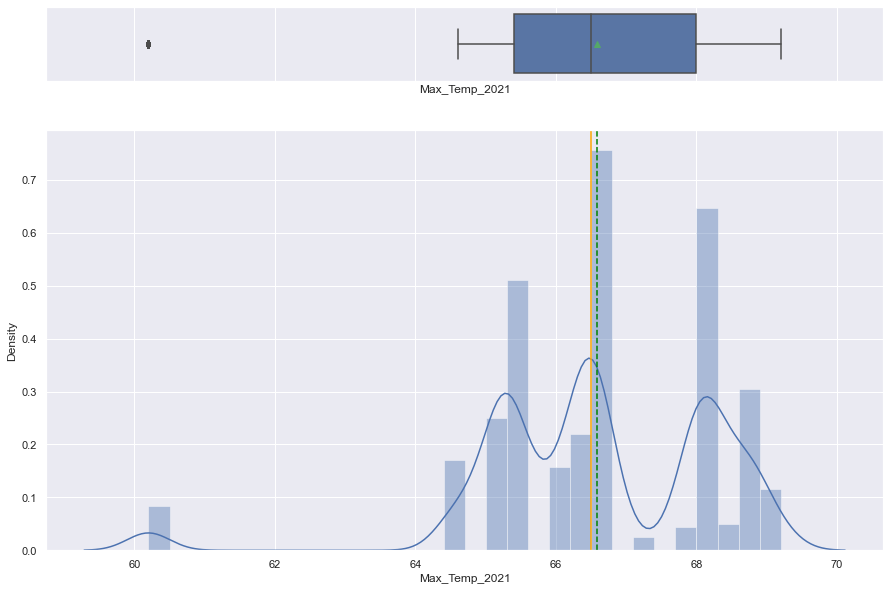

In [115]:
hist_box('Max_Temp_2021')

In [116]:
df_2021[df_2021['Max_Temp_2021']<60]


Empty DataFrame
Columns: [BR_COD_2021, LAT_016, LOG_017, YEAR_BUILT_027, ADT_029_2021, STRUCTURE_KID_043A, STRUCTURE_TYPE_043B, STRUCTURE_LE_MT_049, DECK_WIDTH_MT_052, YEAR_RECOSTRUCTED_106, PERCET_ADT_TRUCK_109, Max_Temp_2021, Min_Tem_2021, Yr_in_Srv, Range_temp_2021]
Index: []

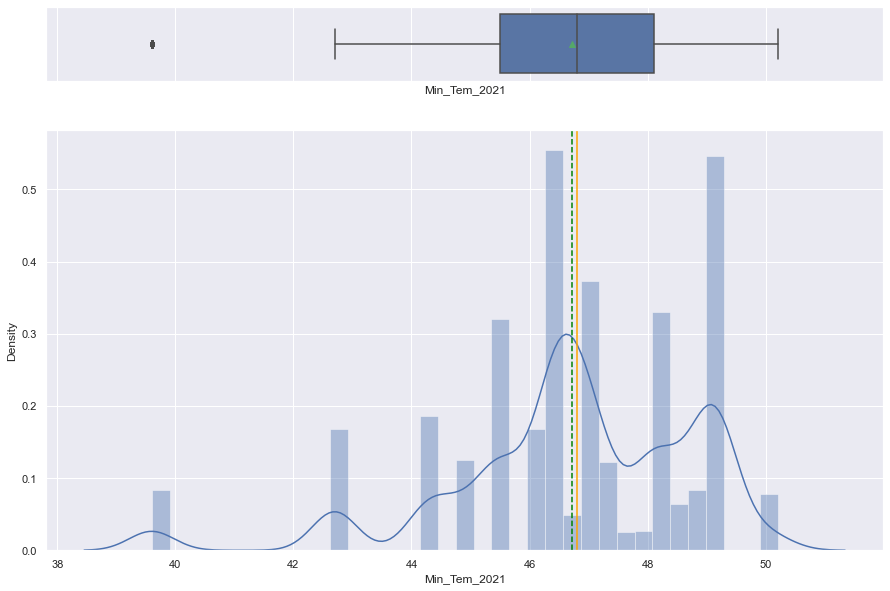

In [117]:
hist_box('Min_Tem_2021')

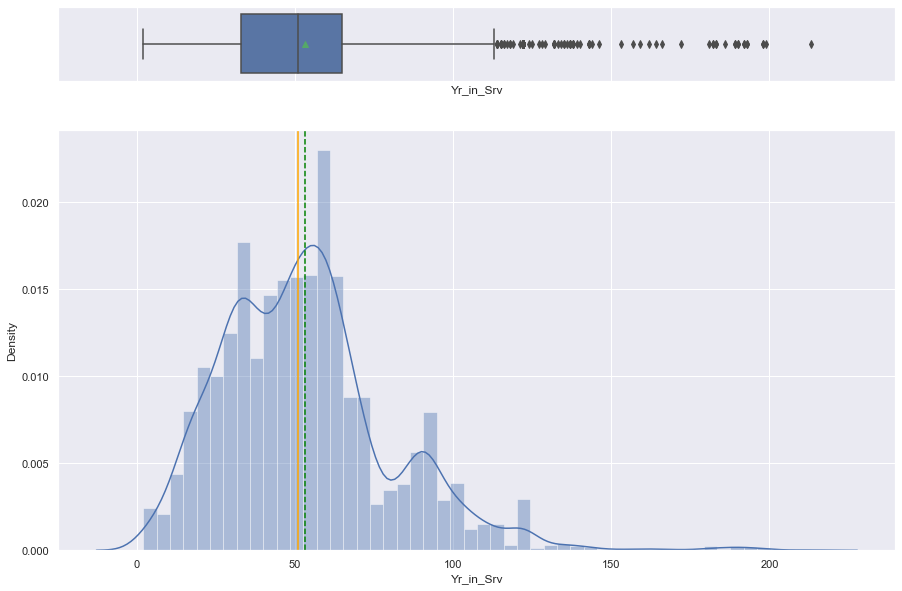

In [118]:
hist_box('Yr_in_Srv')

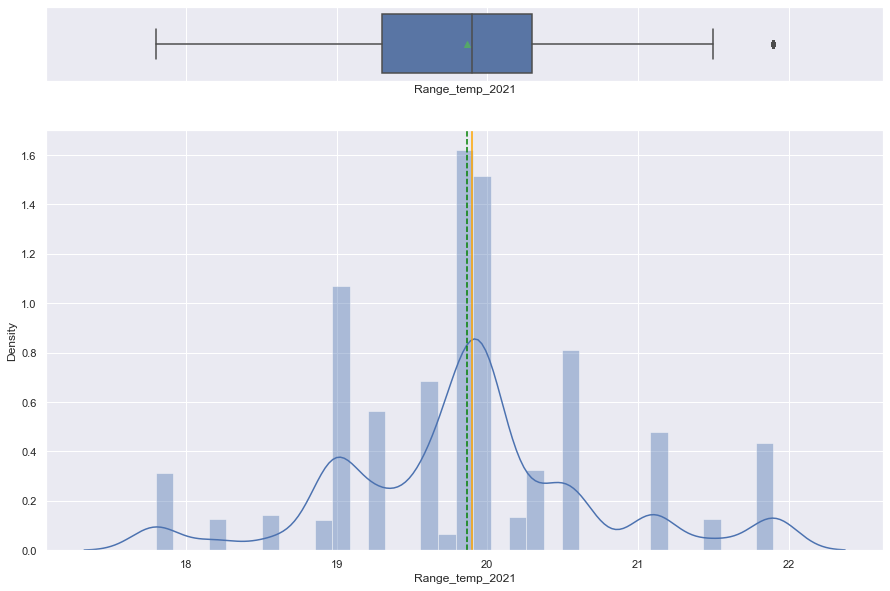

In [119]:
hist_box('Range_temp_2021')

In [120]:
df_2021[df_2021['Range_temp_2021']>22]


Empty DataFrame
Columns: [BR_COD_2021, LAT_016, LOG_017, YEAR_BUILT_027, ADT_029_2021, STRUCTURE_KID_043A, STRUCTURE_TYPE_043B, STRUCTURE_LE_MT_049, DECK_WIDTH_MT_052, YEAR_RECOSTRUCTED_106, PERCET_ADT_TRUCK_109, Max_Temp_2021, Min_Tem_2021, Yr_in_Srv, Range_temp_2021]
Index: []

**Observations:**
- The variable LAT_016 have outliers.
- Check out the Structure_kid and Structure LEN?
- For the year recunstructed Define a new variable and delete all the -1.
- For the variables ADT_020 and ADT_Truck check the values and delete the -1.

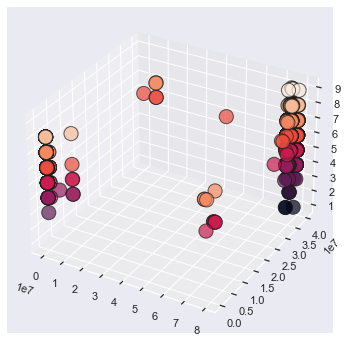

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = df_2021['LOG_017']
y = df_2021['LAT_016']
z = df_2021['BR_COD_2021']
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
linewidths=1, alpha=.7,
edgecolor='k',
s = 200,
c=z)
plt.show()

### **Bivariate Analysis**

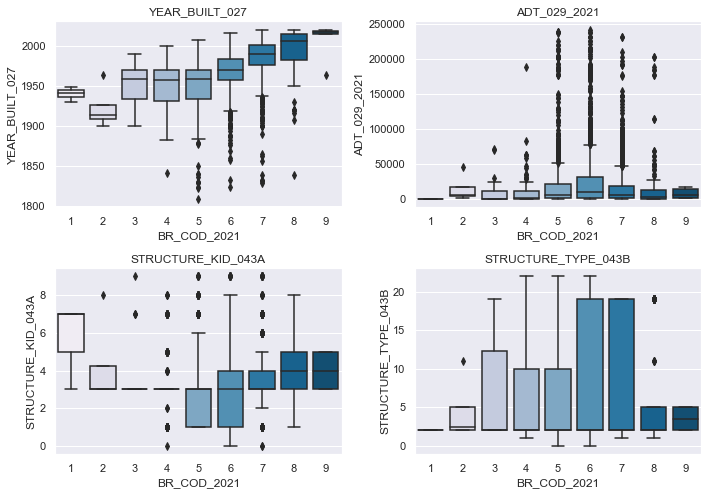

In [122]:
cols = df_2021[['YEAR_BUILT_027', 'ADT_029_2021', 'STRUCTURE_KID_043A', 'STRUCTURE_TYPE_043B']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df_2021["BR_COD_2021"],df_2021[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

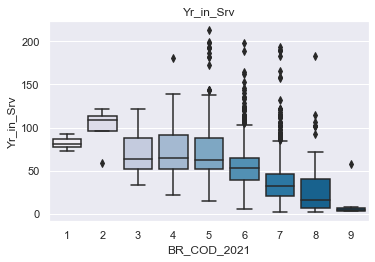

In [123]:
cols = df_2021[['Yr_in_Srv']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df_2021["BR_COD_2021"],df_2021[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#Change it to the previous format 

<AxesSubplot:xlabel='STRUCTURE_KID_043A', ylabel='count'>

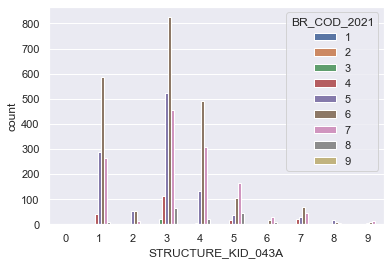

In [124]:
sns.countplot(x=df_2021["STRUCTURE_KID_043A"],hue=df_2021["BR_COD_2021"])

<AxesSubplot:xlabel='ADT_029_2021', ylabel='count'>

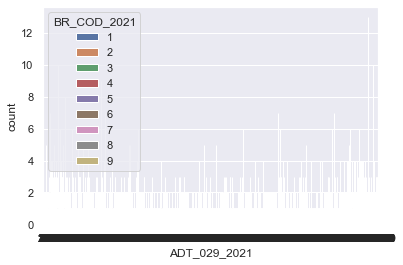

In [125]:
sns.countplot(x=df_2021["ADT_029_2021"],hue=df_2021["BR_COD_2021"])

NameError: name 'df_2021' is not defined

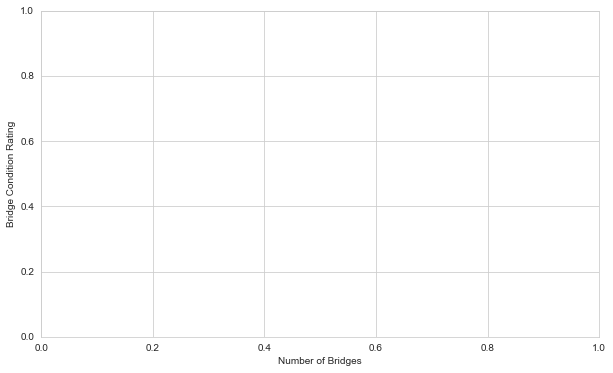

In [40]:

sns.set_style("whitegrid")
plt.ylabel('Bridge Condition Rating')
plt.xlabel('Number of Bridges')

sns.countplot(x=df_2021["BR_COD_2021"]);

 **Multivariate Analysis**


**Pairwise Correlation**

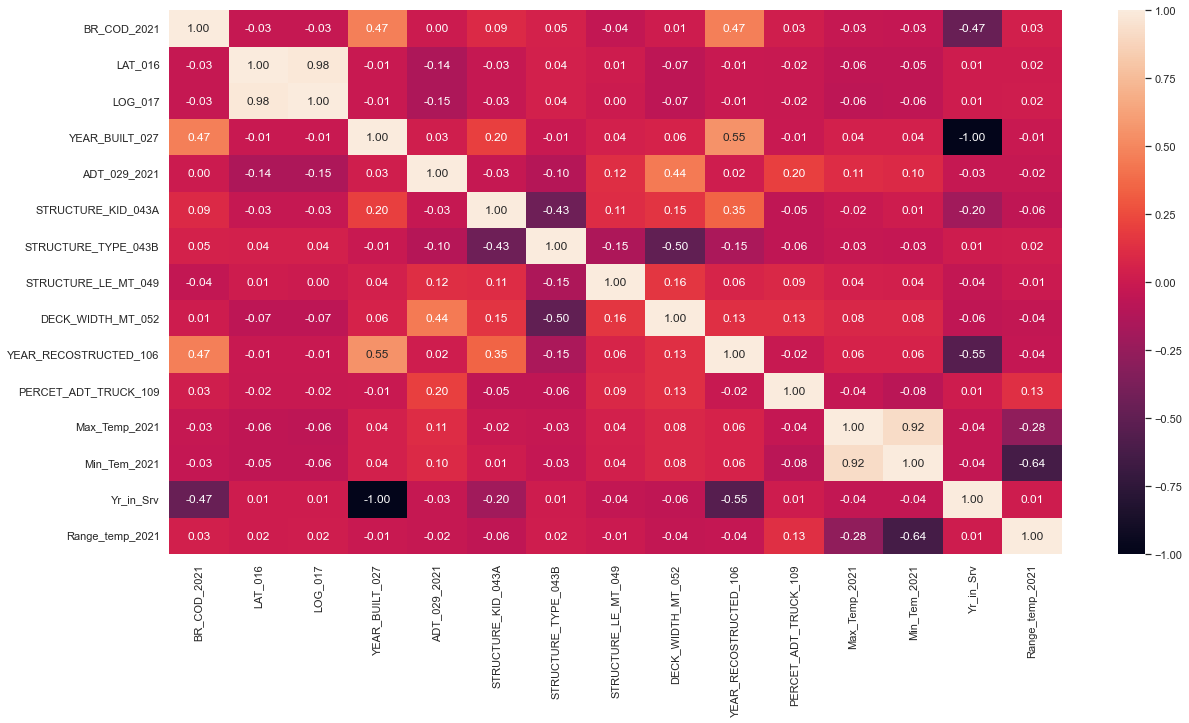

In [127]:
plt.figure(figsize=(20,10))
sns.heatmap(df_2021.corr(),annot=True,fmt=".2f")
plt.show()

 **Observations:**
- We can see a **high positive correlation** among the following variables: 
    1. LAT and LONG
    2. Year reconstructed and year built 
    3. Min temp and Max temp

- We can see a **high negative correlation** among the following variables:
    1. Min_TEMp and Range Temp
    2. Yr in service and Yr built


In [128]:
df_2021.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4939 entries, 1 to 5333
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BR_COD_2021            4939 non-null   int64  
 1   LAT_016                4939 non-null   int64  
 2   LOG_017                4939 non-null   int64  
 3   YEAR_BUILT_027         4939 non-null   int64  
 4   ADT_029_2021           4939 non-null   int64  
 5   STRUCTURE_KID_043A     4939 non-null   int64  
 6   STRUCTURE_TYPE_043B    4939 non-null   int64  
 7   STRUCTURE_LE_MT_049    4939 non-null   float64
 8   DECK_WIDTH_MT_052      4939 non-null   float64
 9   YEAR_RECOSTRUCTED_106  4939 non-null   float64
 10  PERCET_ADT_TRUCK_109   4939 non-null   float64
 11  Max_Temp_2021          4939 non-null   float64
 12  Min_Tem_2021           4939 non-null   float64
 13  Yr_in_Srv              4939 non-null   int64  
 14  Range_temp_2021        4939 non-null   float64
dtypes: f

# **Data Preparation**

# First Model without deleting the variables which are highly corrolated. 

In [129]:
# Separating the dependent and independent columns in the dataset
X = df_2021.drop(['BR_COD_2021'], axis=1);
Y = df_2021[['BR_COD_2021']];

In [130]:
df_2021[['BR_COD_2021']]

BR_COD_2021
1               4
2               6
3               6
5               7
6               5
...           ...
5329            5
5330            6
5331            5
5332            6
5333            4

[4939 rows x 1 columns]

In [131]:
# Splitting the dataset into the Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape);
print('X Test Shape:', X_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

X Train Shape: (3951, 14)
X Test Shape: (988, 14)
Y Train Shape: (3951, 1)
Y Test Shape: (988, 1)


## **Model Building**


In [132]:
# Importing the basic libraries we will require for the project

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import csv,json;
import os;

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn import tree;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix;
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1);

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')
# Importing the basic libraries we will require for the project




# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [133]:
def metrics_score(actual, predicted):
  print(classification_report(actual, predicted));
  cm = confusion_matrix(actual, predicted);
  plt.figure(figsize = (8,5));
  sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['1', '2', '3', '4', '5', '6', '7','8','9'], yticklabels = ['1', '2', '3', '4', '5', '6', '7','8','9'])
  plt.ylabel('Actual'); plt.xlabel('Predicted');
  plt.show()

### **The k-Nearest Neighbors Model**


#### **Before Scaling and PCA** 

              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.00      0.00      0.00         3
           3       0.29      0.11      0.15        19
           4       0.48      0.28      0.36       163
           5       0.52      0.57      0.55       870
           6       0.63      0.75      0.68      1733
           7       0.64      0.49      0.55      1035
           8       0.48      0.12      0.20       121
           9       0.00      0.00      0.00         5

    accuracy                           0.60      3951
   macro avg       0.36      0.31      0.31      3951
weighted avg       0.60      0.60      0.59      3951



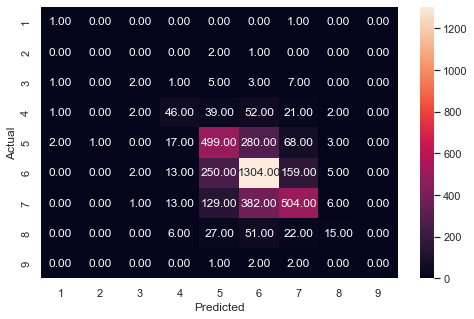

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_train_predictions = knn_model.predict(X_train)
metrics_score(y_train,knn_train_predictions)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.12      0.07      0.09        41
           5       0.27      0.32      0.29       217
           6       0.50      0.59      0.54       433
           7       0.43      0.29      0.35       259
           8       0.14      0.03      0.05        30
           9       0.00      0.00      0.00         1

    accuracy                           0.41       988
   macro avg       0.16      0.15      0.15       988
weighted avg       0.40      0.41      0.40       988



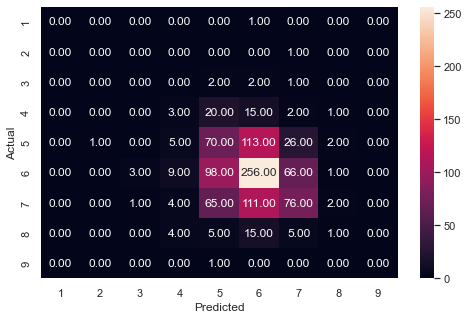

In [135]:
y_test_pred_knn = knn_model.predict(X_test);
metrics_score(y_test, y_test_pred_knn)

#### **After Scaling and PCA**


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        19
           4       0.48      0.36      0.41       163
           5       0.61      0.61      0.61       870
           6       0.68      0.76      0.72      1733
           7       0.72      0.67      0.69      1035
           8       0.82      0.27      0.41       121
           9       0.00      0.00      0.00         5

    accuracy                           0.67      3951
   macro avg       0.37      0.30      0.32      3951
weighted avg       0.67      0.67      0.66      3951



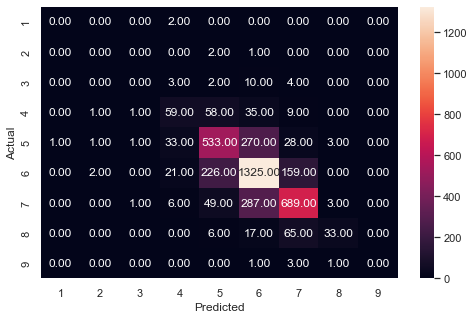

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
knn_model= KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train)
knn_train_predictions = knn_model.predict(X_train_pca)
metrics_score(y_train,knn_train_predictions)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.02      0.02      0.02        41
           5       0.26      0.35      0.30       217
           6       0.47      0.45      0.46       433
           7       0.36      0.31      0.33       259
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00         1

    accuracy                           0.36       988
   macro avg       0.12      0.13      0.12       988
weighted avg       0.36      0.36      0.35       988



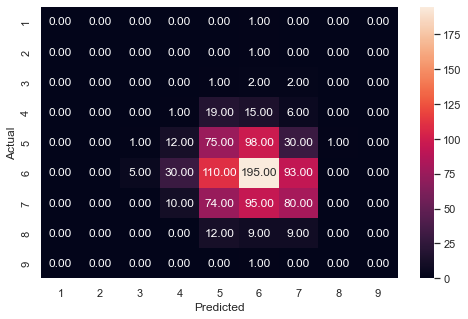

In [137]:
y_test_pred_knn = knn_model.predict(X_test_pca);
metrics_score(y_test, y_test_pred_knn)

# Model 2 after deleting the highly corrolated variables

In [138]:
df_Model2=df_2021[['BR_COD_2021','LAT_016','LOG_017','Yr_in_Srv', 'ADT_029_2021','STRUCTURE_KID_043A', 'STRUCTURE_TYPE_043B', 
                   'STRUCTURE_LE_MT_049','DECK_WIDTH_MT_052','Range_temp_2021', 'PERCET_ADT_TRUCK_109']]

In [139]:
# Separating the dependent and independent columns in the dataset
X2 = df_Model2.drop(['BR_COD_2021'], axis=1);
Y2 = df_Model2[['BR_COD_2021']];

In [140]:
# Splitting the dataset into the Training and Testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.1, random_state=42, stratify=Y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train2.shape);
print('X Test Shape:', X_test2.shape);
print('Y Train Shape:', y_train2.shape);
print('Y Test Shape:', y_test2.shape);

X Train Shape: (4445, 10)
X Test Shape: (494, 10)
Y Train Shape: (4445, 1)
Y Test Shape: (494, 1)


              precision    recall  f1-score   support

           1       0.33      0.67      0.44         3
           2       0.00      0.00      0.00         4
           3       0.29      0.09      0.14        22
           4       0.44      0.29      0.35       184
           5       0.52      0.56      0.54       978
           6       0.63      0.75      0.69      1949
           7       0.65      0.49      0.56      1164
           8       0.59      0.16      0.25       136
           9       0.00      0.00      0.00         5

    accuracy                           0.60      4445
   macro avg       0.38      0.34      0.33      4445
weighted avg       0.60      0.60      0.59      4445



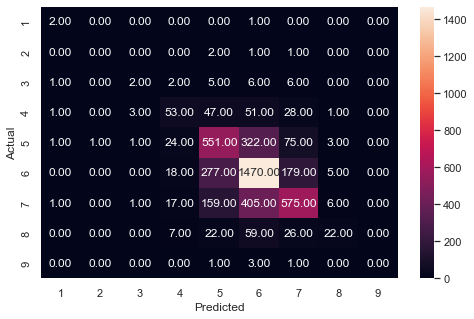

In [141]:
#Before scaling the data 
knn_model.fit(X_train2,y_train2)
knn_train_predictions = knn_model.predict(X_train2)
metrics_score(y_train2,knn_train_predictions)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.30      0.15      0.20        20
           5       0.28      0.30      0.29       109
           6       0.48      0.58      0.53       217
           7       0.35      0.27      0.31       130
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         1

    accuracy                           0.40       494
   macro avg       0.20      0.19      0.19       494
weighted avg       0.38      0.40      0.38       494



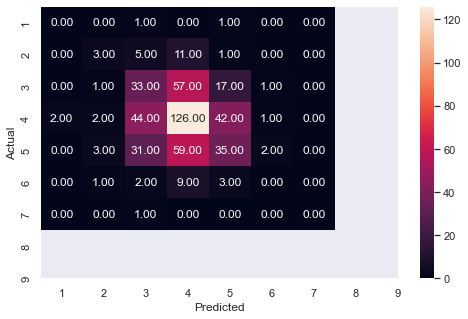

In [142]:
y_test_pred_knn = knn_model.predict(X_test2);
metrics_score(y_test2, y_test_pred_knn)

              precision    recall  f1-score   support

           1       0.25      0.67      0.36         3
           2       0.00      0.00      0.00         4
           3       0.25      0.09      0.13        22
           4       0.47      0.37      0.41       184
           5       0.59      0.63      0.61       978
           6       0.68      0.75      0.71      1949
           7       0.71      0.64      0.68      1164
           8       0.67      0.26      0.37       136
           9       0.00      0.00      0.00         5

    accuracy                           0.66      4445
   macro avg       0.40      0.38      0.36      4445
weighted avg       0.66      0.66      0.65      4445



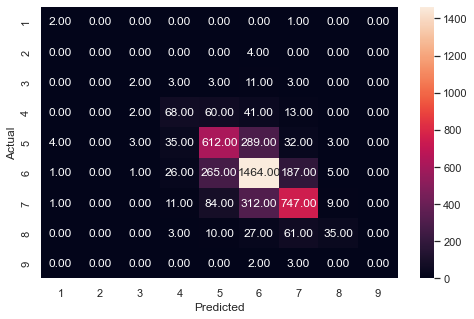

In [143]:
#After scaling 
X_train_std2 = scaler.fit_transform(X_train2)
X_test_std2 = scaler.fit_transform(X_test2)
pca = PCA()
X_train_pca2 = pca.fit_transform(X_train_std2)
X_test_pca2 = pca.fit_transform(X_test_std2)
knn_model2= KNeighborsClassifier()
knn_model2.fit(X_train_pca2,y_train2)
knn_train_predictions = knn_model2.predict(X_train_pca2)
metrics_score(y_train2,knn_train_predictions)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00       217
           7       0.26      1.00      0.42       130
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         1

    accuracy                           0.26       494
   macro avg       0.04      0.14      0.06       494
weighted avg       0.07      0.26      0.11       494



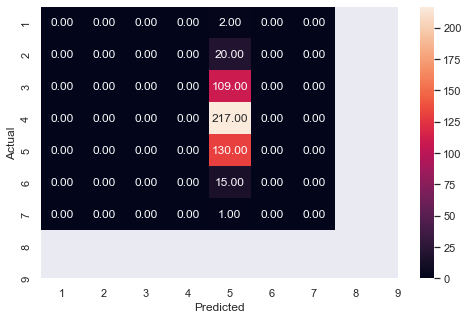

In [144]:
y_test_pred_knn = knn_model.predict(X_test_pca2);
metrics_score(y_test2, y_test_pred_knn)

# **Tree-Based Models**

 **The Decision Tree Classifier**

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00       163
           5       1.00      1.00      1.00       870
           6       1.00      1.00      1.00      1733
           7       1.00      1.00      1.00      1035
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00         5

    accuracy                           1.00      3951
   macro avg       1.00      1.00      1.00      3951
weighted avg       1.00      1.00      1.00      3951



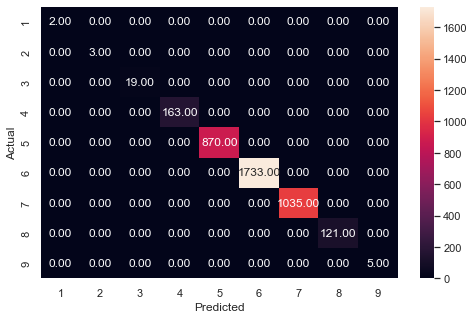

In [145]:
dt = DecisionTreeClassifier(random_state=1);
dt.fit(X_train, y_train)
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.25      0.22      0.23        41
           5       0.40      0.43      0.42       217
           6       0.57      0.55      0.56       433
           7       0.59      0.59      0.59       259
           8       0.35      0.40      0.38        30
           9       0.00      0.00      0.00         1

    accuracy                           0.51       988
   macro avg       0.24      0.24      0.24       988
weighted avg       0.51      0.51      0.51       988



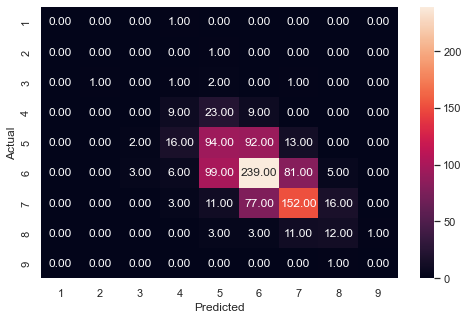

In [146]:
y_test_pred_dt = dt.predict(X_test);
metrics_score(y_test, y_test_pred_dt)

# **Model Evaluation using K-Fold Cross Validation**

In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.4544480336358509 


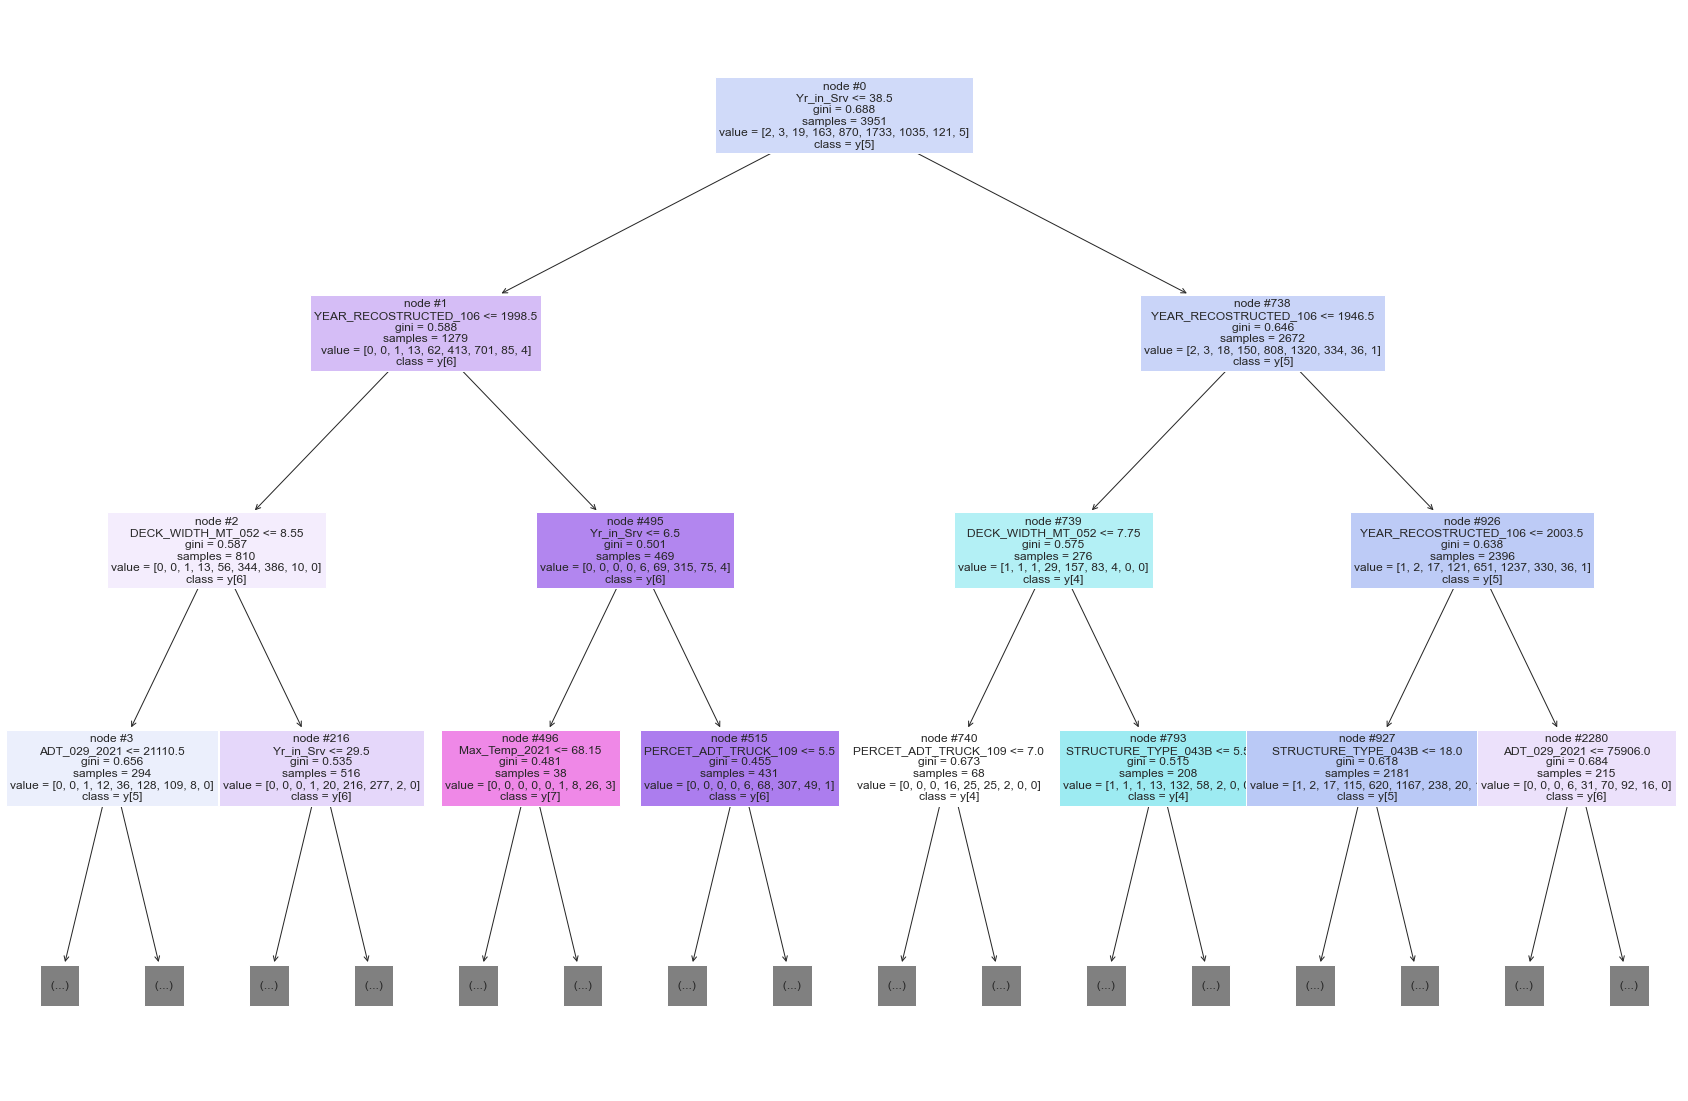

In [148]:
features = list(X.columns);
plt.figure(figsize=(30,20))
tree.plot_tree(dt, max_depth=3, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True);
plt.show()

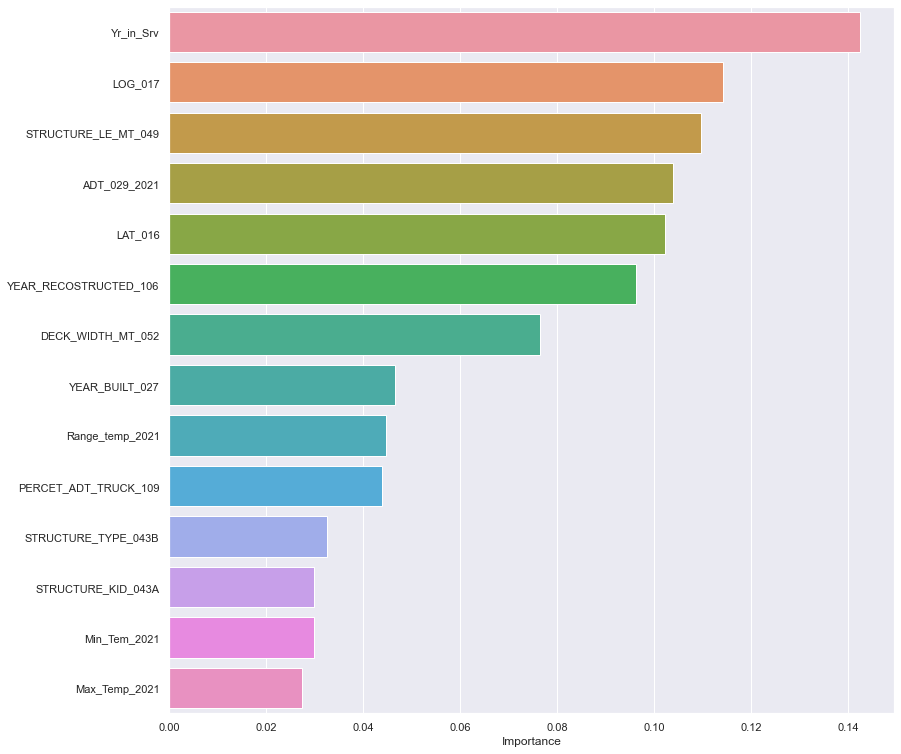

                       Importance
Yr_in_Srv                 0.14239
LOG_017                   0.11417
STRUCTURE_LE_MT_049       0.10973
ADT_029_2021              0.10392
LAT_016                   0.10213
YEAR_RECOSTRUCTED_106     0.09617
DECK_WIDTH_MT_052         0.07653
YEAR_BUILT_027            0.04653
Range_temp_2021           0.04471
PERCET_ADT_TRUCK_109      0.04392
STRUCTURE_TYPE_043B       0.03246
STRUCTURE_KID_043A        0.02995
Min_Tem_2021              0.02994
Max_Temp_2021             0.02744


In [149]:
# Plotting the feature importance
importances = dt.feature_importances_
columns = X.columns;
importance_df_Model2 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(13,13));
sns.barplot(importance_df_Model2.Importance, importance_df_Model2.index)
plt.show()

print(importance_df_Model2)

# Model 3 creating Dummy variable for categorial variables

In [150]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4939 entries, 1 to 5333
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BR_COD_2021            4939 non-null   int64  
 1   LAT_016                4939 non-null   int64  
 2   LOG_017                4939 non-null   int64  
 3   YEAR_BUILT_027         4939 non-null   int64  
 4   ADT_029_2021           4939 non-null   int64  
 5   STRUCTURE_KID_043A     4939 non-null   int64  
 6   STRUCTURE_TYPE_043B    4939 non-null   int64  
 7   STRUCTURE_LE_MT_049    4939 non-null   float64
 8   DECK_WIDTH_MT_052      4939 non-null   float64
 9   YEAR_RECOSTRUCTED_106  4939 non-null   float64
 10  PERCET_ADT_TRUCK_109   4939 non-null   float64
 11  Max_Temp_2021          4939 non-null   float64
 12  Min_Tem_2021           4939 non-null   float64
 13  Yr_in_Srv              4939 non-null   int64  
 14  Range_temp_2021        4939 non-null   float64
dtypes: f

In [151]:
# Creating numerical columns
num_cols=['LAT_016','LOG_017', 'YEAR_BUILT_027', 'ADT_029_2021',  
'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052', 'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109','Max_Temp_2021',  
 'Min_Tem_2021','Range_temp_2021','Yr_in_Srv']

# Creating categorical variables 
cat_cols= ['STRUCTURE_KID_043A','STRUCTURE_TYPE_043B']

In [152]:
# Checking summary statistics
df_2021[num_cols].describe().T

count           mean            std        min  \
LAT_016               4939.00000 36004086.96173 10467989.31852   38.00000   
LOG_017               4939.00000 70768306.36809 20475636.81622   -7.00000   
YEAR_BUILT_027        4939.00000     1968.82426       26.99233 1809.00000   
ADT_029_2021          4939.00000    21883.92934    37668.14771    0.00000   
STRUCTURE_LE_MT_049   4939.00000       57.88247      138.85554    6.10000   
DECK_WIDTH_MT_052     4939.00000       11.70300        9.89808    0.00000   
YEAR_RECOSTRUCTED_106 4939.00000     1980.31687       21.73869 1809.00000   
PERCET_ADT_TRUCK_109  4939.00000        6.82021        3.34158    0.00000   
Max_Temp_2021         4939.00000       66.58789        1.67124   60.20000   
Min_Tem_2021          4939.00000       46.72203        2.08705   39.60000   
Range_temp_2021       4939.00000       19.86586        0.86784   17.80000   
Yr_in_Srv             4939.00000       53.17574       26.99233    2.00000   

                                 25%            50%            75%  \
LAT_016               38575622.50000 39162122.00000 39309621.00000   
LOG_017               76244613.50000 76465124.00000 77102604.00000   
YEAR_BUILT_027            1957.00000     1971.00000     1989.00000   
ADT_029_2021              1110.00000     7120.00000    23192.50000   
STRUCTURE_LE_MT_049         11.30000       24.70000       61.60000   
DECK_WIDTH_MT_052            6.10000       10.70000       15.10000   
YEAR_RECOSTRUCTED_106     1968.00000     1984.00000     1995.00000   
PERCET_ADT_TRUCK_109         5.00000        8.00000        8.00000   
Max_Temp_2021               65.40000       66.50000       68.00000   
Min_Tem_2021                45.50000       46.80000       48.10000   
Range_temp_2021             19.30000       19.90000       20.30000   
Yr_in_Srv                   33.00000       51.00000       65.00000   

                                 max  
LAT_016               39716264.00000  
LOG_017               79285250.00000  
YEAR_BUILT_027            2020.00000  
ADT_029_2021            242500.00000  
STRUCTURE_LE_MT_049       3064.50000  
DECK_WIDTH_MT_052          125.00000  
YEAR_RECOSTRUCTED_106     2021.00000  
PERCET_ADT_TRUCK_109        40.00000  
Max_Temp_2021               69.20000  
Min_Tem_2021                50.20000  
Range_temp_2021             21.90000  
Yr_in_Srv                  213.00000

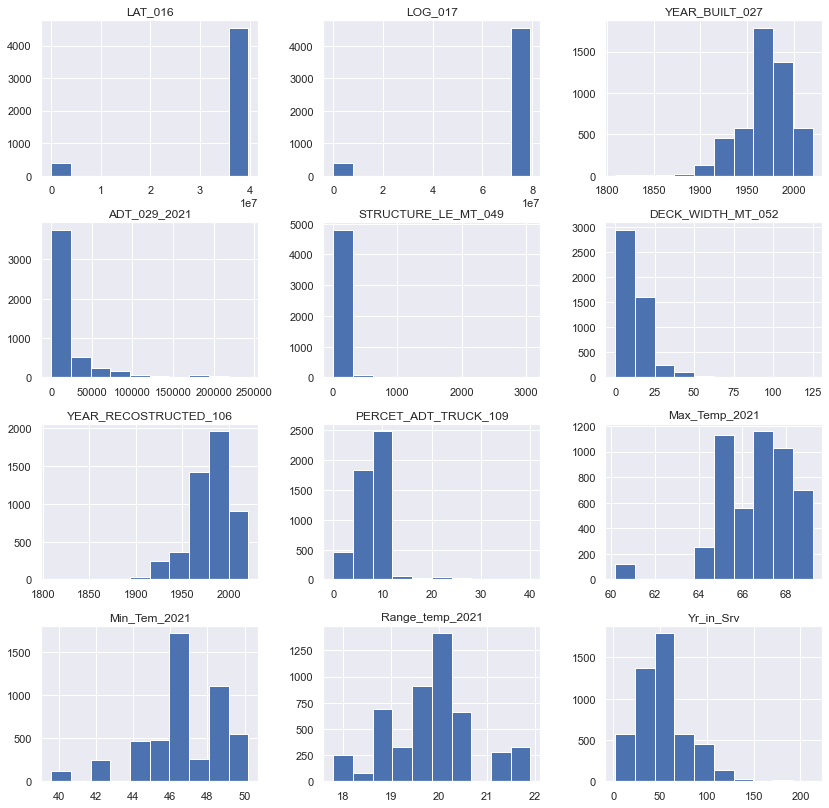

In [153]:
# Creating histograms
df_2021[num_cols].hist(figsize=(14,14))
plt.show()

In [154]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df_2021[i].value_counts(normalize=True))
    print('*'*40)

3   0.40595
1   0.24033
4   0.19376
5   0.07512
7   0.03401
2   0.02470
6   0.01093
8   0.00790
9   0.00628
0   0.00101
Name: STRUCTURE_KID_043A, dtype: float64
****************************************
2    0.49929
19   0.22697
1    0.09597
11   0.03847
5    0.03604
4    0.02733
10   0.02713
7    0.01883
3    0.01559
6    0.00547
16   0.00425
9    0.00162
12   0.00121
22   0.00081
17   0.00040
0    0.00040
21   0.00020
Name: STRUCTURE_TYPE_043B, dtype: float64
****************************************


In [155]:
df_2021.groupby(['BR_COD_2021'])[num_cols].mean()

LAT_016        LOG_017  YEAR_BUILT_027  ADT_029_2021  \
BR_COD_2021                                                               
1           38737899.33333 76526230.33333      1940.00000      74.66667   
2           39189466.50000 76347723.25000      1922.25000   14664.00000   
3           37457208.33333 73488313.91667      1950.87500   11130.16667   
4           36623562.01471 71990711.85294      1951.00490    8482.93627   
5           36406824.89696 71814436.18031      1952.55382   21184.75897   
6           35774199.80979 70121129.68190      1967.20591   26599.47599   
7           36199673.60742 71263424.80294      1985.37558   17387.86785   
8           33401210.30464 65705505.23841      1994.49007   18808.04636   
9           38989739.00000 76468135.16667      2008.33333    7665.00000   

             STRUCTURE_LE_MT_049  DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  \
BR_COD_2021                                                                  
1                       27.60000            6.96667             1944.00000   
2                       39.07500           16.47500             1961.50000   
3                       56.35417            9.36667             1973.29167   
4                       44.08039            9.86961             1966.48039   
5                       66.43882           12.06320             1967.59246   
6                       63.77368           11.78255             1978.20914   
7                       45.65386           11.57264             1994.03400   
8                       37.49470           11.92450             2004.51656   
9                       34.48333           11.13333             2008.33333   

             PERCET_ADT_TRUCK_109  Max_Temp_2021  Min_Tem_2021  \
BR_COD_2021                                                      
1                         5.00000       66.26667      46.73333   
2                         5.00000       66.50000      47.32500   
3                         5.54167       66.52500      46.98750   
4                         6.04412       66.34265      46.68578   
5                         6.82245       66.66458      46.75961   
6                         6.96353       66.64404      46.78476   
7                         6.66770       66.52280      46.65510   
8                         7.38411       66.17285      46.13510   
9                         7.00000       65.71667      46.23333   

             Range_temp_2021  Yr_in_Srv  
BR_COD_2021                              
1                   19.53333   82.00000  
2                   19.17500   99.75000  
3                   19.53750   71.12500  
4                   19.65686   70.99510  
5                   19.90497   69.44618  
6                   19.85928   54.79409  
7                   19.86770   36.62442  
8                   20.03775   27.50993  
9                   19.48333   13.66667

# Let's check the relationship between different numerical variables¶


<AxesSubplot:>

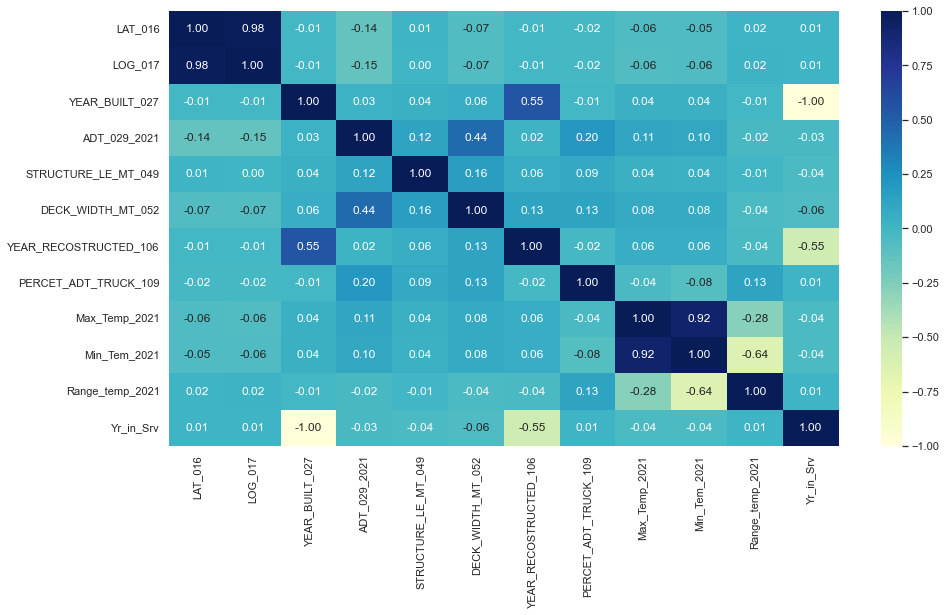

In [156]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df_2021[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

In [157]:
df_M3=df_2021[['BR_COD_2021','YEAR_BUILT_027', 'ADT_029_2021',  
'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052', 'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109','Range_temp_2021', 'STRUCTURE_KID_043A','STRUCTURE_TYPE_043B']]

# Creating dummy variables for categorical Variables


In [158]:
# Creating list of dummy columns
to_get_dummies_for = ['STRUCTURE_KID_043A','STRUCTURE_TYPE_043B' ]

# Creating dummy variables
df_M3 = pd.get_dummies(data = df_M3, columns = to_get_dummies_for, drop_first = True)      

In [159]:
# Separating the dependent and independent columns in the dataset
X3 = df_M3.drop(['BR_COD_2021'], axis=1);
Y3 = df_M3[['BR_COD_2021']];

In [160]:
# Splitting the dataset into the Training and Testing set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42, stratify=Y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train3.shape);
print('X Test Shape:', X_test3.shape);
print('Y Train Shape:', y_train3.shape);
print('Y Test Shape:', y_test3.shape);

X Train Shape: (3951, 32)
X Test Shape: (988, 32)
Y Train Shape: (3951, 1)
Y Test Shape: (988, 1)


## **Model Building**


 **The k-Nearest Neighbors Model**


#### **After Scaling and PCA**


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.33      0.21      0.26        19
           4       0.50      0.33      0.40       163
           5       0.61      0.61      0.61       870
           6       0.68      0.77      0.73      1733
           7       0.73      0.68      0.70      1035
           8       0.62      0.21      0.32       121
           9       0.00      0.00      0.00         5

    accuracy                           0.67      3951
   macro avg       0.39      0.31      0.34      3951
weighted avg       0.67      0.67      0.66      3951



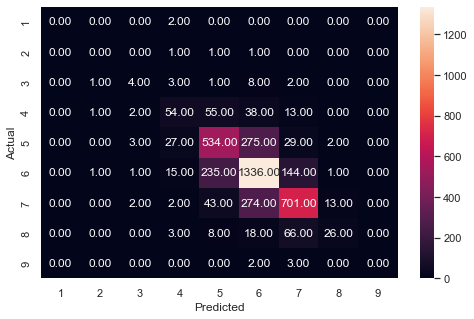

In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_std3 = scaler.fit_transform(X_train3)
X_test_std3 = scaler.fit_transform(X_test3)
pca = PCA()
X_train_pca3 = pca.fit_transform(X_train_std3)
X_test_pca3 = pca.fit_transform(X_test_std3)
knn_model3= KNeighborsClassifier()
knn_model3.fit(X_train_pca3,y_train3)
knn_train_predictions = knn_model3.predict(X_train_pca3)
metrics_score(y_train3,knn_train_predictions)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        41
           5       0.38      0.40      0.39       217
           6       0.50      0.62      0.55       433
           7       0.45      0.33      0.38       259
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00         1

    accuracy                           0.45       988
   macro avg       0.15      0.15      0.15       988
weighted avg       0.42      0.45      0.43       988



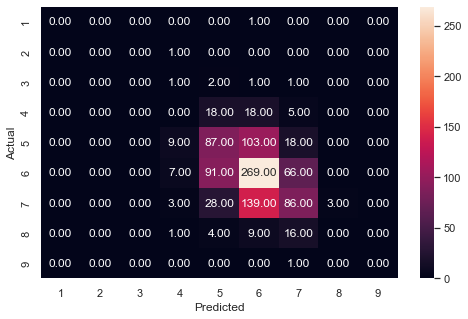

In [162]:
y_test_pred_knn = knn_model3.predict(X_test_pca3);
metrics_score(y_test3, y_test_pred_knn)

 **The Decision Tree Classifier**

 **The Decision Tree Classifier**

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        19
           4       0.99      1.00      1.00       163
           5       0.99      1.00      0.99       870
           6       1.00      1.00      1.00      1733
           7       1.00      1.00      1.00      1035
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00         5

    accuracy                           1.00      3951
   macro avg       1.00      1.00      1.00      3951
weighted avg       1.00      1.00      1.00      3951



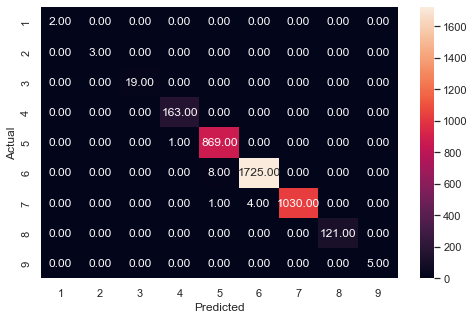

In [164]:
dt3 = DecisionTreeClassifier(random_state=1);
dt3.fit(X_train3, y_train3)
y_train_pred_dt3 = dt3.predict(X_train3)
metrics_score(y_train3, y_train_pred_dt3)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.17      0.20      0.18        41
           5       0.42      0.41      0.41       217
           6       0.58      0.58      0.58       433
           7       0.55      0.55      0.55       259
           8       0.47      0.50      0.48        30
           9       0.50      1.00      0.67         1

    accuracy                           0.51       988
   macro avg       0.30      0.36      0.32       988
weighted avg       0.51      0.51      0.51       988



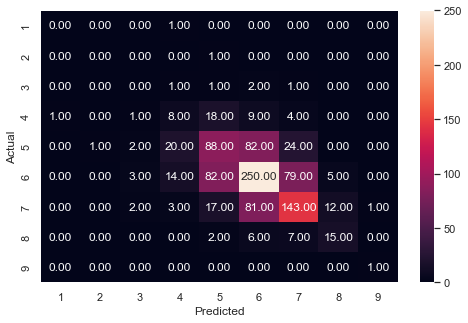

In [165]:
y_test_pred_dt3 = dt3.predict(X_test3);
metrics_score(y_test3, y_test_pred_dt3)

**Model Evaluation using K-Fold Cross Validation**

In [166]:
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(dt3, X_test3, y_test3, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores3)} ")

The average score of the model with K-5 Cross validation is 0.477695739117059 


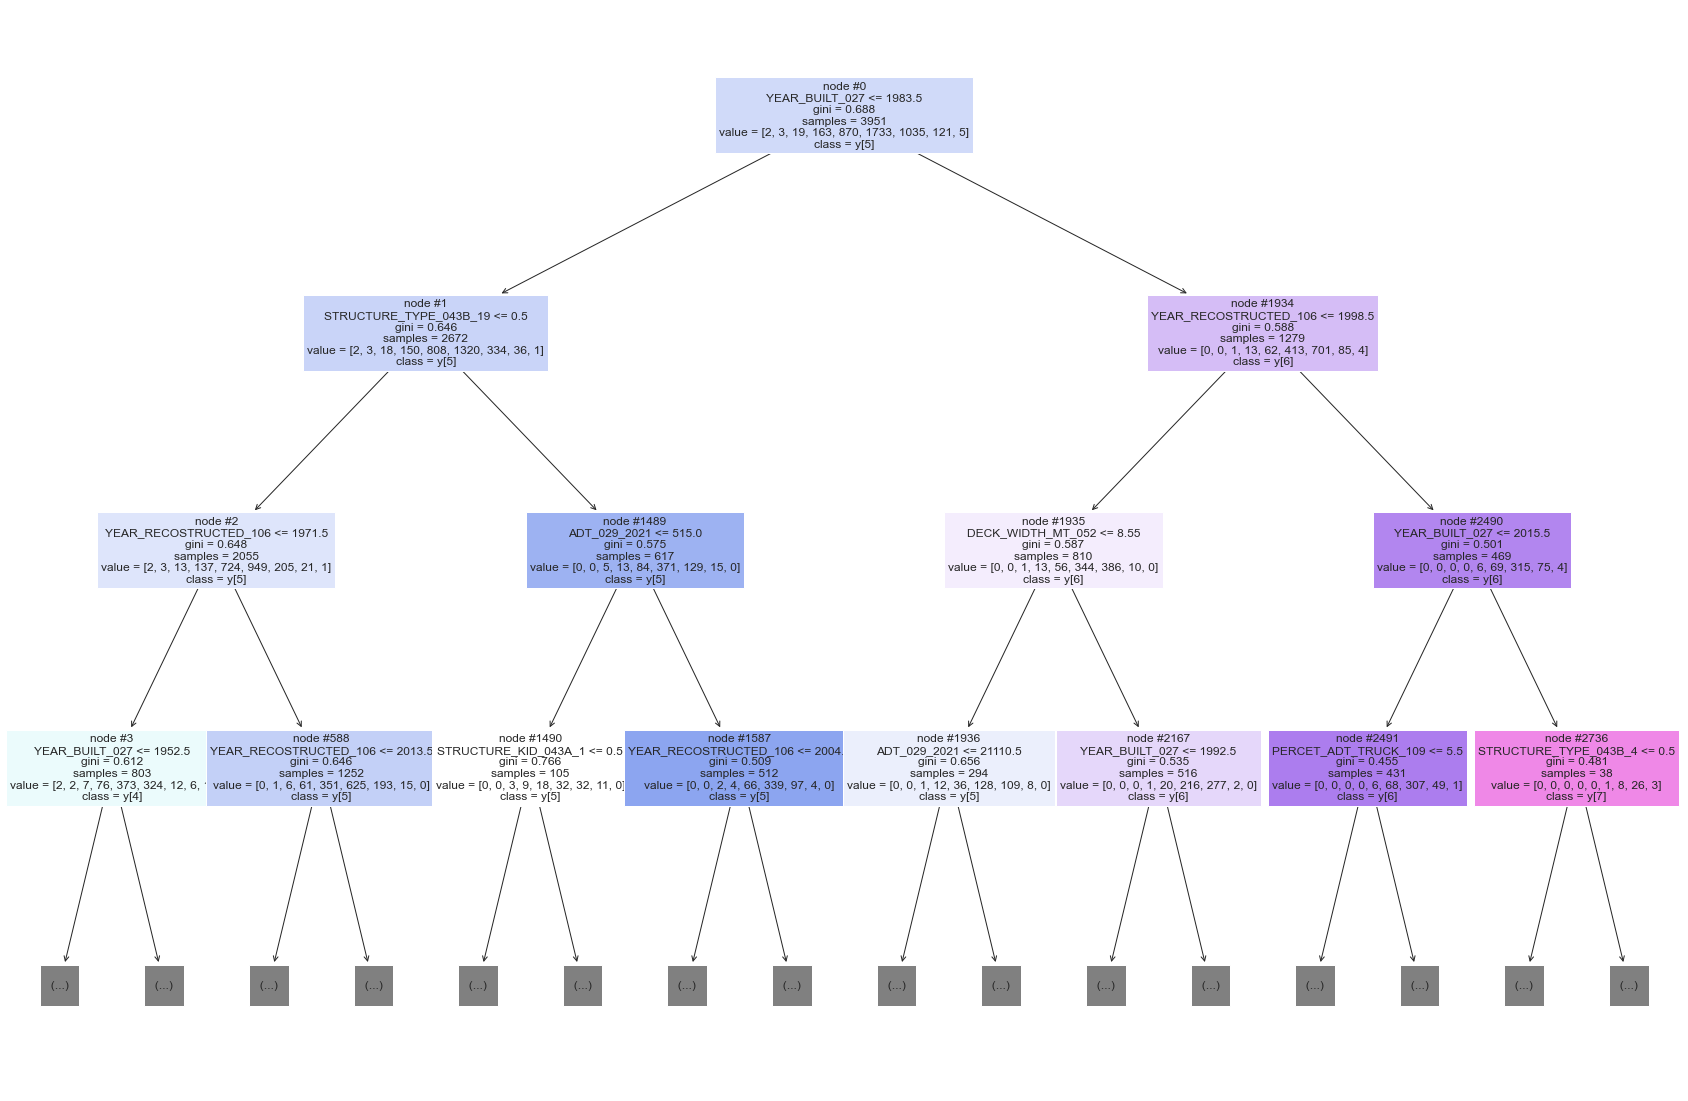

In [167]:
features = list(X3.columns);
plt.figure(figsize=(30,20))
tree.plot_tree(dt3, max_depth=3, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True);
plt.show()

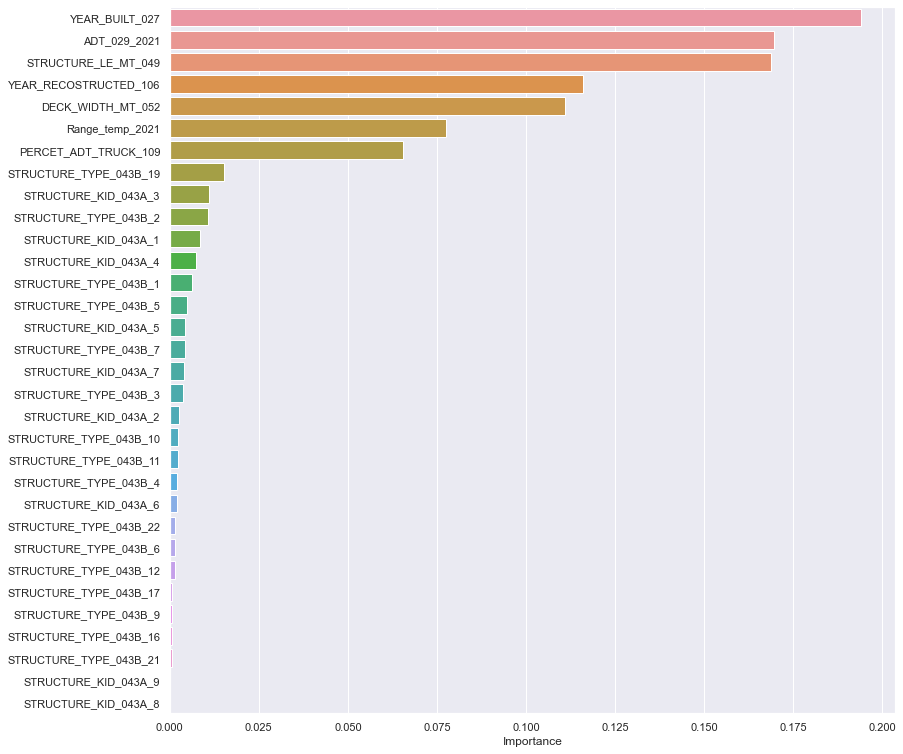

                        Importance
YEAR_BUILT_027             0.19390
ADT_029_2021               0.16971
STRUCTURE_LE_MT_049        0.16864
YEAR_RECOSTRUCTED_106      0.11603
DECK_WIDTH_MT_052          0.11081
Range_temp_2021            0.07743
PERCET_ADT_TRUCK_109       0.06557
STRUCTURE_TYPE_043B_19     0.01511
STRUCTURE_KID_043A_3       0.01097
STRUCTURE_TYPE_043B_2      0.01078
STRUCTURE_KID_043A_1       0.00856
STRUCTURE_KID_043A_4       0.00749
STRUCTURE_TYPE_043B_1      0.00617
STRUCTURE_TYPE_043B_5      0.00489
STRUCTURE_KID_043A_5       0.00440
STRUCTURE_TYPE_043B_7      0.00417
STRUCTURE_KID_043A_7       0.00394
STRUCTURE_TYPE_043B_3      0.00363
STRUCTURE_KID_043A_2       0.00251
STRUCTURE_TYPE_043B_10     0.00227
STRUCTURE_TYPE_043B_11     0.00220
STRUCTURE_TYPE_043B_4      0.00215
STRUCTURE_KID_043A_6       0.00200
STRUCTURE_TYPE_043B_22     0.00140
STRUCTURE_TYPE_043B_6      0.00138
STRUCTURE_TYPE_043B_12     0.00138
STRUCTURE_TYPE_043B_17     0.00066
STRUCTURE_TYPE_043B_

In [168]:
# Plotting the feature importance
importances = dt3.feature_importances_
columns = X3.columns;
importance_df_M3 = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(13,13));
sns.barplot(importance_df_M3.Importance, importance_df_M3.index)
plt.show()

print(importance_df_M3)

# Random Forest

### Random Forest is a bagging algorithm where the base models are Decision Trees. Samples are taken from the training data and on each sample, a decision tree makes a prediction.

**The results from all the decision trees are combined and the final prediction is made using voting (for classification problems) or averaging (for regression problems).**

In [169]:
print(df_M3['BR_COD_2021'].value_counts(normalize=True))

6   0.43855
7   0.26200
5   0.22009
4   0.04130
8   0.03057
3   0.00486
9   0.00121
2   0.00081
1   0.00061
Name: BR_COD_2021, dtype: float64


In [170]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

rf_estimator.fit(X_train3, y_train3)

RandomForestClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        19
           4       0.99      1.00      1.00       163
           5       0.99      1.00      0.99       870
           6       1.00      0.99      1.00      1733
           7       1.00      1.00      1.00      1035
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00         5

    accuracy                           1.00      3951
   macro avg       1.00      1.00      1.00      3951
weighted avg       1.00      1.00      1.00      3951



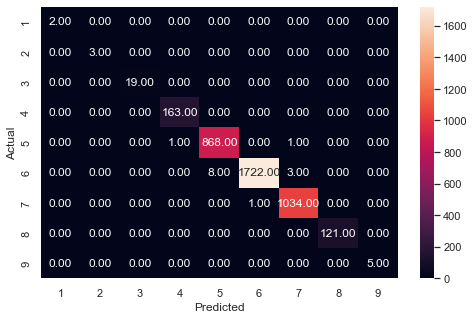

In [171]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train3)

metrics_score(y_train3, y_pred_train_rf)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.47      0.17      0.25        41
           5       0.51      0.40      0.45       217
           6       0.59      0.74      0.66       433
           7       0.65      0.63      0.64       259
           8       0.53      0.27      0.36        30
           9       0.00      0.00      0.00         1

    accuracy                           0.59       988
   macro avg       0.31      0.24      0.26       988
weighted avg       0.58      0.59      0.58       988



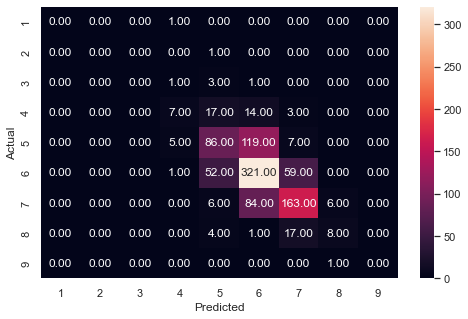

In [172]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test3)

metrics_score(y_test3, y_pred_test_rf)

In [173]:
#Let's try another one with given weight to the classes

# Fitting the Random Forest classifier on the training data
rf_estimator2 = RandomForestClassifier(class_weight = {1: 0.0006, 2: 0.0008, 3:0.0048, 4:0.0413, 5:0.22, 6:0.44,7:0.26, 8:0.03, 9:0.0012}, random_state = 1)

rf_estimator2.fit(X_train3, y_train3)

RandomForestClassifier(class_weight={1: 0.0006, 2: 0.0008, 3: 0.0048, 4: 0.0413,
                                     5: 0.22, 6: 0.44, 7: 0.26, 8: 0.03,
                                     9: 0.0012},
                       random_state=1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        19
           4       1.00      0.99      1.00       163
           5       1.00      0.99      0.99       870
           6       0.99      1.00      1.00      1733
           7       1.00      1.00      1.00      1035
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00         5

    accuracy                           1.00      3951
   macro avg       1.00      1.00      1.00      3951
weighted avg       1.00      1.00      1.00      3951



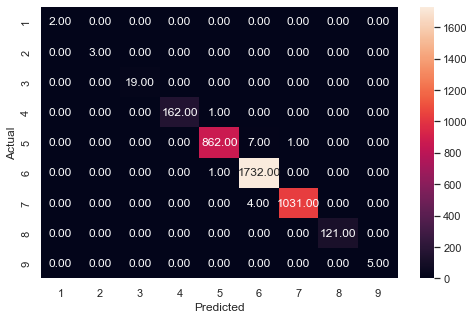

In [174]:
# Checking performance on the training data
y_pred_train_rf2 = rf_estimator2.predict(X_train3)

metrics_score(y_train3, y_pred_train_rf2)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.23      0.07      0.11        41
           5       0.50      0.42      0.46       217
           6       0.59      0.71      0.65       433
           7       0.64      0.63      0.64       259
           8       0.53      0.27      0.36        30
           9       0.00      0.00      0.00         1

    accuracy                           0.58       988
   macro avg       0.28      0.23      0.25       988
weighted avg       0.56      0.58      0.57       988



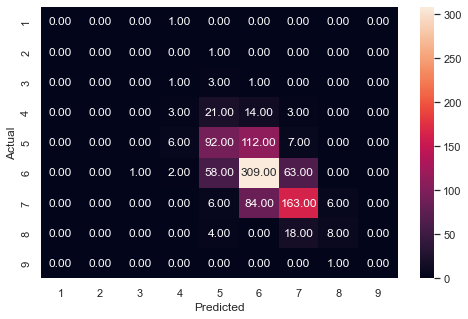

In [175]:
# Checking performance on the testing data
y_pred_test_rf2 = rf_estimator2.predict(X_test3)

metrics_score(y_test3, y_pred_test_rf2)

In [176]:
#Let's try giving them equal weight 
#Let's try another one with given weight to the classes

# Fitting the Random Forest classifier on the training data
rf_estimator3 = RandomForestClassifier(class_weight = {1: 0.11, 2: 0.11, 3:0.11, 4:0.11, 5:0.11, 6:0.11,7:0.11, 8:0.11, 9:0.11}, random_state = 1)

rf_estimator3.fit(X_train3, y_train3)

RandomForestClassifier(class_weight={1: 0.11, 2: 0.11, 3: 0.11, 4: 0.11,
                                     5: 0.11, 6: 0.11, 7: 0.11, 8: 0.11,
                                     9: 0.11},
                       random_state=1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        19
           4       1.00      0.99      1.00       163
           5       0.99      0.99      0.99       870
           6       1.00      1.00      1.00      1733
           7       1.00      1.00      1.00      1035
           8       1.00      1.00      1.00       121
           9       1.00      1.00      1.00         5

    accuracy                           1.00      3951
   macro avg       1.00      1.00      1.00      3951
weighted avg       1.00      1.00      1.00      3951



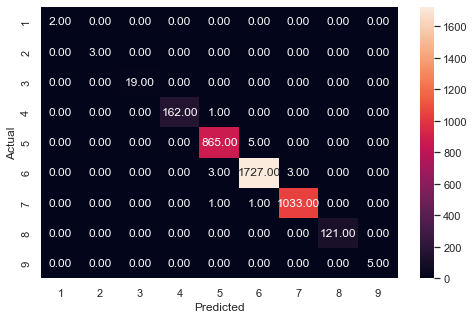

In [177]:
# Checking performance on the training data
y_pred_train_rf3 = rf_estimator3.predict(X_train3)

metrics_score(y_train3, y_pred_train_rf3)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.29      0.12      0.17        41
           5       0.52      0.42      0.46       217
           6       0.61      0.74      0.67       433
           7       0.66      0.64      0.65       259
           8       0.44      0.23      0.30        30
           9       0.00      0.00      0.00         1

    accuracy                           0.60       988
   macro avg       0.28      0.24      0.25       988
weighted avg       0.58      0.60      0.58       988



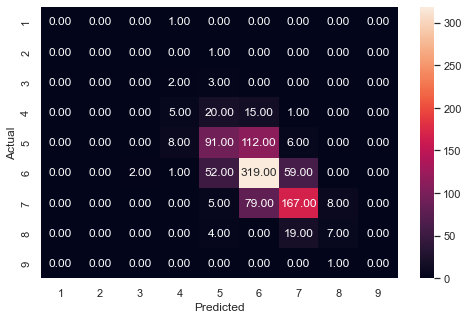

In [178]:
# Checking performance on the testing data
y_pred_test_rf3 = rf_estimator3.predict(X_test3)

metrics_score(y_test3, y_pred_test_rf3)

# Let's check the feature importance of the Random Forest

<AxesSubplot:xlabel='Importance'>

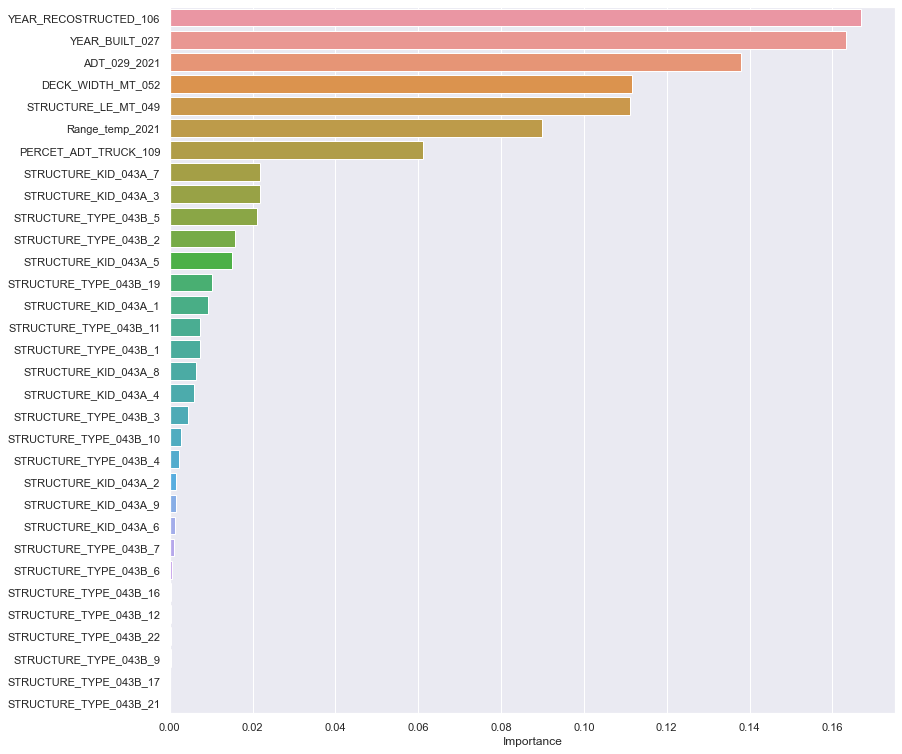

In [179]:
importances = rf_estimator.feature_importances_

columns = X3.columns

importance_df_M3 = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df_M3.Importance, importance_df_M3.index)


In [180]:
print(importance_df_M3)

                        Importance
YEAR_RECOSTRUCTED_106      0.16681
YEAR_BUILT_027             0.16336
ADT_029_2021               0.13800
DECK_WIDTH_MT_052          0.11162
STRUCTURE_LE_MT_049        0.11111
Range_temp_2021            0.09001
PERCET_ADT_TRUCK_109       0.06114
STRUCTURE_KID_043A_7       0.02169
STRUCTURE_KID_043A_3       0.02168
STRUCTURE_TYPE_043B_5      0.02103
STRUCTURE_TYPE_043B_2      0.01584
STRUCTURE_KID_043A_5       0.01500
STRUCTURE_TYPE_043B_19     0.01020
STRUCTURE_KID_043A_1       0.00915
STRUCTURE_TYPE_043B_11     0.00738
STRUCTURE_TYPE_043B_1      0.00720
STRUCTURE_KID_043A_8       0.00642
STRUCTURE_KID_043A_4       0.00581
STRUCTURE_TYPE_043B_3      0.00454
STRUCTURE_TYPE_043B_10     0.00283
STRUCTURE_TYPE_043B_4      0.00216
STRUCTURE_KID_043A_2       0.00148
STRUCTURE_KID_043A_9       0.00144
STRUCTURE_KID_043A_6       0.00124
STRUCTURE_TYPE_043B_7      0.00111
STRUCTURE_TYPE_043B_6      0.00044
STRUCTURE_TYPE_043B_16     0.00037
STRUCTURE_TYPE_043B_

# Creating Deep Learning ANN model


In [181]:
from tensorflow.python.distribute import distribution_strategy_context
from tensorflow.python.framework import ops
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import keras_tensor
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops.ragged import ragged_tensor
from tensorflow.python.util.tf_export import keras_export
from tensorflow.python.framework import tensor_util
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential


from tensorflow.python.ops.losses import util as tf_losses_util

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc

import six

from tensorflow.python.distribute import distribution_strategy_context
from tensorflow.python.framework import ops
from tensorflow.python.framework import smart_cond
from tensorflow.python.framework import tensor_util
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import losses_utils
from tensorflow.python.keras.utils import tf_utils
from tensorflow.python.keras.utils.generic_utils import deserialize_keras_object
from tensorflow.python.keras.utils.generic_utils import serialize_keras_object
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn
from tensorflow.python.ops.losses import losses_impl
from tensorflow.python.ops.losses import util as tf_losses_util
from tensorflow.python.util.tf_export import keras_export
from tensorflow.tools.docs import doc_controls
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

2022-11-07 22:44:51.832279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [182]:
df_M3

BR_COD_2021  YEAR_BUILT_027  ADT_029_2021  STRUCTURE_LE_MT_049  \
1               4            1980           500              7.80000   
2               6            1950          2000              7.10000   
3               6            1975           500              7.90000   
5               7            2011          4400             71.50000   
6               5            1952          1440            749.80000   
...           ...             ...           ...                  ...   
5329            5            1984           150              6.20000   
5330            6            1940           120              8.10000   
5331            5            1944           120              7.70000   
5332            6            1946           200              9.30000   
5333            4            1984           800             16.00000   

      DECK_WIDTH_MT_052  YEAR_RECOSTRUCTED_106  PERCET_ADT_TRUCK_109  \
1               7.80000             1980.00000              30.00000   
2              12.30000             2011.00000              10.00000   
3               0.00000             1975.00000              10.00000   
5              11.50000             2011.00000               5.00000   
6               9.10000             1996.00000              20.00000   
...                 ...                    ...                   ...   
5329           17.00000             1984.00000              10.00000   
5330            7.30000             1940.00000              12.00000   
5331           15.20000             1944.00000              10.00000   
5332           13.40000             1946.00000              10.00000   
5333           10.90000             1984.00000              10.00000   

      Range_temp_2021  STRUCTURE_KID_043A_1  STRUCTURE_KID_043A_2  ...  \
1            19.30000                     0                     0  ...   
2            19.30000                     0                     0  ...   
3            19.00000                     1                     0  ...   
5            18.90000                     0                     0  ...   
6            19.30000                     0                     0  ...   
...               ...                   ...                   ...  ...   
5329         19.80000                     1                     0  ...   
5330         19.80000                     1                     0  ...   
5331         19.80000                     1                     0  ...   
5332         19.80000                     1                     0  ...   
5333         19.80000                     0                     0  ...   

      STRUCTURE_TYPE_043B_7  STRUCTURE_TYPE_043B_9  STRUCTURE_TYPE_043B_10  \
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
5                         0                      0                       0   
6                         0                      0                       0   
...                     ...                    ...                     ...   
5329                      0                      0                       0   
5330                      0                      0                       0   
5331                      0                      0                       0   
5332                      0                      0                       0   
5333                      0                      0                       0   

      STRUCTURE_TYPE_043B_11  STRUCTURE_TYPE_043B_12  STRUCTURE_TYPE_043B_16  \
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
5                          0                       0                       0   
6                          0                      

In [183]:
df_M3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4939 entries, 1 to 5333
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BR_COD_2021             4939 non-null   int64  
 1   YEAR_BUILT_027          4939 non-null   int64  
 2   ADT_029_2021            4939 non-null   int64  
 3   STRUCTURE_LE_MT_049     4939 non-null   float64
 4   DECK_WIDTH_MT_052       4939 non-null   float64
 5   YEAR_RECOSTRUCTED_106   4939 non-null   float64
 6   PERCET_ADT_TRUCK_109    4939 non-null   float64
 7   Range_temp_2021         4939 non-null   float64
 8   STRUCTURE_KID_043A_1    4939 non-null   uint8  
 9   STRUCTURE_KID_043A_2    4939 non-null   uint8  
 10  STRUCTURE_KID_043A_3    4939 non-null   uint8  
 11  STRUCTURE_KID_043A_4    4939 non-null   uint8  
 12  STRUCTURE_KID_043A_5    4939 non-null   uint8  
 13  STRUCTURE_KID_043A_6    4939 non-null   uint8  
 14  STRUCTURE_KID_043A_7    4939 non-null   

In [184]:
# Creating list of dummy columns
to_get_dummies_for = ['BR_COD_2021' ]

# Creating dummy variables
df_M3 = pd.get_dummies(data = df_M3, columns = to_get_dummies_for, drop_first = True)      

In [185]:
# Separating the dependent and independent columns in the dataset
X3 = df_M3.drop(['BR_COD_2021_2','BR_COD_2021_3','BR_COD_2021_4','BR_COD_2021_5','BR_COD_2021_6','BR_COD_2021_7','BR_COD_2021_8','BR_COD_2021_9'], axis=1);
Y3 = df_M3[['BR_COD_2021_2','BR_COD_2021_3','BR_COD_2021_4','BR_COD_2021_5','BR_COD_2021_6','BR_COD_2021_7','BR_COD_2021_8','BR_COD_2021_9']];


In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)
pca = PCA()
X_pca3 = pca.fit_transform(X3)


In [187]:
model = Sequential()
model.add(Dense(16, input_shape=(X_pca3.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(8, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
Total params: 664
Trainable params: 664
Non-trainable params: 0
_________________________________________________________________


2022-11-07 22:44:59.808091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [188]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=100, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_pca3,
                    Y3,
                    callbacks=[es],
                    epochs=800000000, # you can set this to a big number!
                    batch_size=200,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/800000000
20/20 [==============================] - 1s 19ms/step - loss: 2.0221 - accuracy: 0.2442 - val_loss: 1.9554 - val_accuracy: 0.2814
Epoch 2/800000000
20/20 [==============================] - 0s 7ms/step - loss: 1.8296 - accuracy: 0.3323 - val_loss: 1.7954 - val_accuracy: 0.3350
Epoch 3/800000000
20/20 [==============================] - 0s 6ms/step - loss: 1.6888 - accuracy: 0.3789 - val_loss: 1.6683 - val_accuracy: 0.3664
Epoch 4/800000000
20/20 [==============================] - 0s 4ms/step - loss: 1.5711 - accuracy: 0.4060 - val_loss: 1.5635 - val_accuracy: 0.3998
Epoch 5/800000000
20/20 [==============================] - 0s 5ms/step - loss: 1.4723 - accuracy: 0.4356 - val_loss: 1.4794 - val_accuracy: 0.4291
Epoch 6/800000000
20/20 [==============================] - 0s 7ms/step - loss: 1.3904 - accuracy: 0.4617 - val_loss: 1.4111 - val_accuracy: 0.4484
Epoch 7/800000000
20/20 [==============================] - 0s 5ms/step - loss: 1.3237 - accuracy: 0.4854 - val_loss: 

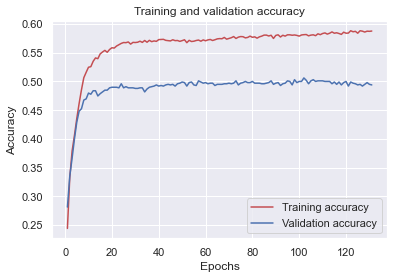

In [189]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# ANN for NORMAlize variable

In [190]:
from sklearn.preprocessing import MinMaxScaler
X3 = df_M3.drop(['BR_COD_2021_2','BR_COD_2021_3','BR_COD_2021_4','BR_COD_2021_5','BR_COD_2021_6','BR_COD_2021_7','BR_COD_2021_8','BR_COD_2021_9'], axis=1);
norm = MinMaxScaler()
columns=X3.columns
X_norm = norm.fit_transform(X3)
X_norm = pd.DataFrame(X_norm, columns = columns)


In [191]:
model = Sequential()
model.add(Dense(16, input_shape=(X_norm.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(8, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 664
Trainable params: 664
Non-trainable params: 0
_________________________________________________________________


In [192]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=100, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_norm,
                    Y3,
                    callbacks=[es],
                    epochs=800000, # you can set this to a big number!
                    batch_size=200,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/800000
20/20 [==============================] - 1s 16ms/step - loss: 1.8605 - accuracy: 0.4047 - val_loss: 1.7669 - val_accuracy: 0.4352
Epoch 2/800000
20/20 [==============================] - 0s 8ms/step - loss: 1.6963 - accuracy: 0.4239 - val_loss: 1.6267 - val_accuracy: 0.4706
Epoch 3/800000
20/20 [==============================] - 0s 6ms/step - loss: 1.5725 - accuracy: 0.4275 - val_loss: 1.5155 - val_accuracy: 0.4787
Epoch 4/800000
20/20 [==============================] - 0s 5ms/step - loss: 1.4778 - accuracy: 0.4318 - val_loss: 1.4332 - val_accuracy: 0.4777
Epoch 5/800000
20/20 [==============================] - 0s 6ms/step - loss: 1.4076 - accuracy: 0.4384 - val_loss: 1.3740 - val_accuracy: 0.4747
Epoch 6/800000
20/20 [==============================] - 0s 6ms/step - loss: 1.3589 - accuracy: 0.4414 - val_loss: 1.3347 - val_accuracy: 0.4727
Epoch 7/800000
20/20 [==============================] - 0s 7ms/step - loss: 1.3265 - accuracy: 0.4477 - val_loss: 1.3094 - val_accuracy

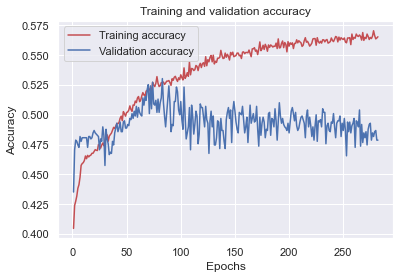

In [193]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#  Hyperparameter Tuning
**Hyperparameters** are the parameters that govern the entire training process. Their values are set before the learning process begins. They have a significant effect on the model’s performance. The process of finding optimal hyperparameters for a model is known as **hyperparameter tuning**. Choosing optimal hyperparameters can lead to improvements in the overall model’s performance and can help in reducing both overfitting and underfitting.

###**Types of Hyperparameter Tuning**
Some models consist of a huge number of hyperparameters, and finding the optimal set of hyperparameters can be a very time-consuming process. To make the process efficient, the most commonly used methods are,

*   Grid Search 
*   Random Search

####**Grid Search**

Grid search is a technique used to find the optimal set of hyperparameters for a model from the provided search space.

Let’s understand how grid search works, with an example


![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/gridsearch.png)



- Let the grey box above be set of all possible hyperparameters
- Let these black circles indicate the search space
- Grid search will iterate over all black circles in a sequence
- And finally gives the best set of hyperparameters based on the best score obtained


Grid Seach doesn’t work well on large search spaces. It will find the best set of hyperparameters but at a high cost. Grid search is best used when we have small search space. We can use a grid search to get the best possible results when we don’t have any time constraints, but when we have time constraints, it’s better to go with the random search.

###**Random Search**

Random Search is another technique to find the best set of hyperparameters which takes lesser time than grid search

Random search is very similar to grid search, the difference is that in the random search,

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/randomsearch.png)

Here we will define the number of iterations to search. Not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. Also, the set of hyperparameters is not searched sequentially. So out of the entire search space of hyperparameters, only a certain number of sets of hyperparameters will be checked randomly.

Random SearchWorks well on large search spaces and gives better results than grid search but it doesn’t guarantee to find the best set of hyperparameters.



### **Tuning Models**
 
We will tune Decision Trees and Random Forest models. For tuning, we will only use Grid Search.

####**Decision Tree**
Please refer to the sklearn link to learn more about the hyperparameters and values that the algorithm can take https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.



**Here are some of the parameters,**

1) **Criterion{“gini”,  “entropy”}**

The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

2) **max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

3) **min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [194]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42, stratify=Y);


In [195]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train3, y_train3)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [196]:
rf_estimator_tuned.fit(X_train3, y_train3)

RandomForestClassifier(class_weight='balanced', max_features=0.7,
                       random_state=1)

In [197]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train3)

metrics_score(y_train3, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        19
           2       0.99      1.00      1.00       163
           3       0.99      1.00      0.99       870
           4       1.00      0.99      1.00      1733
           5       1.00      1.00      1.00      1035
           6       1.00      1.00      1.00       121
           7       1.00      1.00      1.00         5

   micro avg       1.00      1.00      1.00      3949
   macro avg       1.00      1.00      1.00      3949
weighted avg       1.00      1.00      1.00      3949
 samples avg       1.00      1.00      1.00      3949



ValueError: multilabel-indicator is not supported

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test3)

metrics_score(y_test3, y_pred_test_rf_tuned)

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X3.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

# Observation 

** Accuracy of the training set is up to 100 percent for some of the models presented above, I belive the reason that the accuracy of the test set is not above 60 is that there are not bridge of rating 8 and 9 in the test set after spliting, so I am going to use some of these trained models and test the accuracy of them for the data sets from different years that has not been used in the model development process. 

# Defining a new test set

In [ ]:
df=df.assign(Range_temp_2010=df['Max_Temp_2010']-df['Min_Tem_2010'])

In [ ]:
df_2010=df[['BR_COD_2010', 'YEAR_BUILT_027', 'ADT_029_2021', 'STRUCTURE_KID_043A', 'STRUCTURE_TYPE_043B',  
'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052', 'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109', 'Range_temp_2010']]


In [ ]:
df_2010.isnull().sum()

In [ ]:
def impute_YEAR_RECOSTRUCTED(cols):
    YEAR_RECOSTRUCTED_106 = cols[0]
    YEAR_BUILT_027 = cols[1]
    if pd.isnull(YEAR_RECOSTRUCTED_106):
        return YEAR_BUILT_027
    else:
        return YEAR_RECOSTRUCTED_106

In [ ]:
#Apply the function
df_2010['YEAR_RECOSTRUCTED_106'] = df_2010[['YEAR_RECOSTRUCTED_106','YEAR_BUILT_027']].apply(impute_YEAR_RECOSTRUCTED, axis=1)

In [ ]:
print(df_2010['YEAR_RECOSTRUCTED_106'].isna().sum()) 

In [ ]:
df_2010['PERCET_ADT_TRUCK_109'] = df_2010['PERCET_ADT_TRUCK_109'].fillna(df_2021['PERCET_ADT_TRUCK_109'].median())
print(df_2010['PERCET_ADT_TRUCK_109'].isna().sum()) 

In [ ]:
# Creating list of dummy columns
to_get_dummies_for = ['STRUCTURE_KID_043A','STRUCTURE_TYPE_043B' ]

# Creating dummy variables
df_2010 = pd.get_dummies(data = df_2010, columns = to_get_dummies_for, drop_first = True)      

In [ ]:
#Defining the x_test and y_test
X_test_2010 = df_2010.drop(['BR_COD_2010'], axis=1);
Y_test_2010 = df_2010[['BR_COD_2010']];


# Let's add more data to the training set to increase the accuracy 

** We will consider the entire data set for 2021 for the training purposes and then we consider the data set for 2010 for the test porpuse.**

### Defining the new training set

In [ ]:
df_M3.columns

In [ ]:
df_2010.columns

In [ ]:

df_2010 = df_2010.drop(['STRUCTURE_TYPE_043B_13'], axis = 1)


In [ ]:
#Defining the x_test and y_test
X_test_2010 = df_2010.drop(['BR_COD_2010'], axis=1);
Y_test_2010 = df_2010[['BR_COD_2010']];

In [ ]:
#Defining the x_test and y_test
X_train_2021 = df_M3.drop(['BR_COD_2021'], axis=1);
Y_train_2021 = df_M3[['BR_COD_2021']];

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train_2021.shape);
print('X Test Shape:', X_test_2010.shape);
print('Y Train Shape:', Y_train_2021.shape);
print('Y Test Shape:', Y_test_2010.shape);

#  **The k-Nearest Neighbors Model**


In [ ]:
X_train_std = scaler.fit_transform(X_train_2021)
X_test_std = scaler.fit_transform(X_test_2010)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
knn_model= KNeighborsClassifier()
knn_model.fit(X_train_pca,Y_train_2021)
knn_train_predictions = knn_model.predict(X_train_pca)
metrics_score(Y_train_2021,knn_train_predictions)

In [ ]:
y_test_pred_knn = knn_model.predict(X_test_2010);
metrics_score(Y_test_2010, y_test_pred_knn)

 **The Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier(random_state=1);
dt.fit(X_train_2021, Y_train_2021)
y_train_pred_dt = dt.predict(X_train_2021)
metrics_score(Y_train_2021, y_train_pred_dt)

In [ ]:
y_test_pred_dt = dt.predict(X_test_2010);
metrics_score(Y_test_2010, y_test_pred_dt)

**Model Evaluation using K-Fold Cross Validation**

In [ ]:
scores = cross_val_score(dt, X_test_2010, Y_test_2010, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

**Random Forest**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator1 = RandomForestClassifier(class_weight = 'balanced', random_state = 1)

rf_estimator1.fit(X_train_2021, Y_train_2021)

In [ ]:
# Checking performance on the training data
y_pred_train_rf1 = rf_estimator1.predict(X_train_2021)

metrics_score(Y_train_2021, y_pred_train_rf1)

In [ ]:
# Checking performance on the testing data
y_pred_test_rf1 = rf_estimator1.predict(X_test_2010)
#metrics_score(X_test_2010, y_pred_test_rf1)

In [ ]:
df_M4=df_M3[['BR_COD_2021','YEAR_BUILT_027', 'ADT_029_2021',  
'STRUCTURE_LE_MT_049', 'DECK_WIDTH_MT_052', 'YEAR_RECOSTRUCTED_106', 'PERCET_ADT_TRUCK_109','Range_temp_2021']]

In [ ]:
df_M4

In [ ]:
# Separating the dependent and independent columns in the dataset
X4 = df_M4.drop(['BR_COD_2021'], axis=1);
Y4 = df_M4[['BR_COD_2021']];

In [ ]:
# Splitting the dataset into the Training and Testing set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42, stratify=Y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train4.shape);
print('X Test Shape:', X_test4.shape);
print('Y Train Shape:', y_train4.shape);
print('Y Test Shape:', y_test4.shape);

 **The k-Nearest Neighbors Model**


**After Scaling and PCA**


In [ ]:
X_train_std4 = scaler.fit_transform(X_train4)
X_test_std4 = scaler.fit_transform(X_test4)
pca = PCA()
X_train_pca4 = pca.fit_transform(X_train_std4)
X_test_pca4 = pca.fit_transform(X_test_std4)
knn_model4= KNeighborsClassifier()
knn_model4.fit(X_train_pca4,y_train4)
knn_train_predictions4 = knn_model4.predict(X_train_pca4)
metrics_score(y_train4,knn_train_predictions4)

In [ ]:
y_test_pred_knn4 = knn_model4.predict(X_test_pca4);
metrics_score(y_test4, y_test_pred_knn4)

# Let's try Normalizing 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
columns=X4.columns
X_norm = norm.fit_transform(X4)
X_norm = pd.DataFrame(X_norm, columns = columns)
X_norm.head()


# Train and Test split of Normalized features
from sklearn.model_selection import train_test_split
x_train5, x_test5, y_train5, y_test5 = train_test_split(X_norm, Y4, test_size = 0.2, random_state = 45)

knn_model4.fit(x_train5,y_train5)
knn_train_predictions5 = knn_model4.predict(x_train5)
metrics_score(y_train5,knn_train_predictions5)


In [ ]:
y_test_pred_knn5 = knn_model4.predict(x_test5);
metrics_score(y_test5, y_test_pred_knn5)

In [ ]:
#Decision tree for normalized variables

In [ ]:
dt5 = DecisionTreeClassifier(random_state=1);
dt5.fit(x_train5, y_train5)
y_train_pred_dt5 = dt5.predict(x_train5)
metrics_score(y_train5, y_train_pred_dt5)

In [ ]:
y_test_pred_dt5 = dt5.predict(x_test5);
metrics_score(y_test5, y_test_pred_dt5)

# Creating Deep Learning ANN model


**Prepare data for modeling**

In [ ]:
# split into X and Y
Y = df_2021['BR_COD_2021']
X = df_2021.drop(['BR_COD_2021'], axis=1)

print(X.shape)
print(Y.shape)

# convert to numpy arrays
X = np.array(X)

In [ ]:
# show Y
Y.head()

In [ ]:
from tensorflow.python.distribute import distribution_strategy_context
from tensorflow.python.framework import ops
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import keras_tensor
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops.ragged import ragged_tensor
from tensorflow.python.util.tf_export import keras_export
from tensorflow.python.framework import tensor_util
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential


from tensorflow.python.ops.losses import util as tf_losses_util

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc

import six

from tensorflow.python.distribute import distribution_strategy_context
from tensorflow.python.framework import ops
from tensorflow.python.framework import smart_cond
from tensorflow.python.framework import tensor_util
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils import losses_utils
from tensorflow.python.keras.utils import tf_utils
from tensorflow.python.keras.utils.generic_utils import deserialize_keras_object
from tensorflow.python.keras.utils.generic_utils import serialize_keras_object
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn
from tensorflow.python.ops.losses import losses_impl
from tensorflow.python.ops.losses import util as tf_losses_util
from tensorflow.python.util.tf_export import keras_export
from tensorflow.tools.docs import doc_controls
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

In [ ]:
# work with labels
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

print(encoded_Y)

In [ ]:
print(dummy_y)


# Build, Compile, Fit model

1. Use the Sequential API to build your model
2. Specify an optimizer (rmsprop or Adam)
3. Set a loss function (categorical_crossentropy)
4. EarlyStopping callbacks to prevent overfitting (patience of 10)
5. Fit the model (make a new variable called ‘history’ so you can evaluate the learning curves)

In [ ]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(9, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

In [ ]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the Model
1. Learning curves (Loss)(skip)
2. Learning curves (Accuracy)
3. Confusion matrix

In [ ]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) # see how the model did!
print(preds[0]) # i'm spreading that prediction across three nodes and they sum to 1
print(np.sum(preds[0]))
# sum it up! Should be 1
## [9.9999988e-01 1.3509347e-07 6.7064638e-16]
## 1.0

# Almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix

In [ ]:
# more detail on how well things were predicted
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))